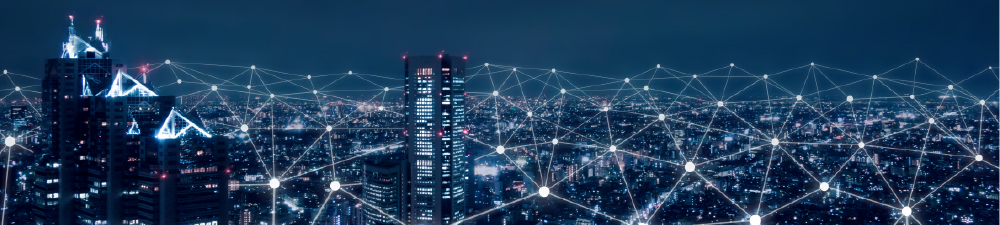

# Mini Project 3  - IU 4.6 Machine Learning

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [2]:
#edit the file location of raw data set
cust_df=pd.read_csv(r"C:\Users\User\Desktop\BCG RISE\Group Projects\Mini Project 3\Mini_project_3_Data.xls")
pd.set_option('display.max_columns', None)

## Exercise

## Placeholder for your analysis

In [3]:
cust_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,LAXSFN818,2.0,2.0,526.0,68.0,64.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,LAXCDG310,2.0,2.0,464.0,48.0,48.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,LAXCDG310,3.0,2.0,378.0,36.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,NEVPOW619,2.0,2.0,433.0,32.0,0.0,Yes,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,9,No,0,30,No,5-Low,Other,Other,No


In [4]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
cust_df.shape
cust_df.dtypes

(51047, 58)

CustomerID                     int64
Churn                         object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
H

In [5]:
cust_df.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,4.085672,28.288981,1.868999,0.298838,114.800121,25.377715,8.178104,90.549515,67.650790,10.158003,0.012277,1.840504,18.756264,1.532157,1.354340,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,10.946905,38.876194,5.096138,1.168277,166.485896,35.209147,16.665878,104.947470,92.752699,15.555284,0.594168,5.585129,9.800138,1.223384,0.675477,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,0.000000,5.300000,0.000000,0.000000,8.300000,3.300000,0.000000,23.000000,11.000000,1.700000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,1.000000,16.300000,0.000000,0.000000,52.800000,13.700000,2.000000,62.000000,35.700000,5.300000,0.000000,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,3.700000,36.300000,1.700000,0.300000,153.500000,34.000000,9.300000,121.300000,88.700000,12.300000,0.000000,1.300000,24.000000,2.000000,2.000000,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,384.300000,848.700000,327.300000,66.000000,2692.400000,644.300000,519.300000,2090.700000,1474.700000,411.700000,81.300000,212.700000,61.000000,196.000000,53.000000,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [6]:
#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis
cust_df[cust_df['MonthlyRevenue'] == 0]
print('No. of customers with 0 monthly revenue:', (cust_df['MonthlyRevenue']==0).sum())

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
12262,3096670,Yes,0.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,2,2,NMXELP915,2.0,2.0,597.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,30,No,5-Low,Suburban,Other,Unknown
13127,3103410,Yes,0.0,55.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.3,5.3,0.0,7.1,0.7,0.7,11.3,2.0,0.0,0.0,0.0,26,2,2,SANSAN210,3.0,3.0,371.0,28.0,30.0,No,No,Yes,No,No,Unknown,No,Yes,No,No,No,Yes,0,0,No,Yes,0,4,No,0,10,No,4-Medium,Other,Other,Unknown
42051,3334666,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,2,2,OKCOKC405,1.0,1.0,307.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,Yes,0,0,No,0,Unknown,No,5-Low,Other,Other,Unknown
49920,3391282,No,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59,2,2,NEVCHU619,2.0,2.0,866.0,26.0,0.0,No,No,No,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,4,No,1,30,No,1-Highest,Suburban,Other,Yes
49946,3391442,No,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,55,1,1,NEVOCN760,1.0,1.0,1671.0,42.0,36.0,No,No,No,No,No,Known,No,No,No,No,No,No,0,0,No,No,0,5,No,0,Unknown,No,1-Highest,Other,Other,Unknown
51035,3399894,No,0.0,76.0,30.0,0.0,0.0,0.0,0.0,0.0,5.7,1.0,13.0,0.7,0.0,11.2,5.7,0.0,29.3,17.0,6.7,0.0,0.0,30,1,1,NEVELC619,1.0,1.0,883.0,48.0,48.0,Yes,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,No,No,0,4,No,0,Unknown,No,2-High,Other,Professional,No


No. of customers with 0 monthly revenue: 6


In [7]:
cust_df[cust_df['MonthlyRevenue'] < 0]
print('No. of customers with -ve monthly revenue:', (cust_df['MonthlyRevenue']<0).sum())

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
26596,3210322,No,-2.52,211.0,0.0,0.33,0.0,0.0,NaN,NaN,0.0,0.0,7.3,1.3,0.0,1.7,8.0,1.3,12.7,17.0,0.0,0.0,0.0,18,2,2,KCYKCK913,2.0,2.0,281.0,0.0,0.0,No,Yes,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,30,No,3-Good,Suburban,Other,Unknown
33352,3265738,No,-5.86,0.0,-5.0,0.00,0.0,0.0,0.0,5.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,3,3,NEVLVS702,1.0,1.0,452.0,34.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,No,0,0,No,No,0,6,No,0,Unknown,No,3-Good,Suburban,Other,Yes
48038,3378298,No,-6.17,0.0,-6.0,0.00,0.0,0.0,0.0,6.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,1,1,NYCSUF516,1.0,1.0,203.0,0.0,0.0,No,Yes,Yes,No,No,Known,No,No,No,No,No,No,0,0,Yes,No,0,6,No,0,Unknown,No,7-Lowest,Suburban,Other,No


No. of customers with -ve monthly revenue: 3


In [8]:
cust_df[cust_df['MonthlyRevenue'].isnull()]
print('No. of customers with null values for monthly revenue:', (cust_df['MonthlyRevenue'].isnull().sum()))

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
122,3000898,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,2,2,DETTOL419,3.0,2.0,902.0,0.0,0.0,No,Yes,No,No,No,Known,No,Yes,No,No,No,Yes,0,0,No,Yes,0,5,No,0,30,No,1-Highest,Other,Other,No
126,3000926,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49,1,1,KCYKCM816,2.0,1.0,4.0,74.0,0.0,No,No,No,No,No,Unknown,Yes,Yes,No,No,No,No,0,0,No,Yes,0,1,No,0,30,No,1-Highest,Town,Other,Unknown
925,3007326,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48,2,2,DALFTW817,5.0,3.0,817.0,36.0,36.0,Yes,No,Yes,Yes,No,Known,No,No,No,No,No,Yes,0,0,No,Yes,0,4,No,0,60,No,3-Good,Other,Self,Yes
1454,3011438,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43,3,2,SANSAN210,2.0,1.0,1245.0,28.0,0.0,Yes,No,No,Yes,No,Known,No,No,No,No,No,No,0,0,Yes,No,0,5,No,1,30,No,1-Highest,Other,Other,Yes
2228,3017394,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,2,2,HARHAR860,1.0,1.0,1196.0,46.0,40.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,5-Low,Suburban,Other,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51038,3399910,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7,0.7,17.0,1.0,2.3,33.6,5.3,0.0,58.3,16.7,4.3,0.0,0.0,28,1,1,LAXRIV909,2.0,2.0,282.0,32.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,0,30,No,1-Highest,Suburban,Other,Unknown
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,LAXSFN818,2.0,2.0,526.0,68.0,64.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,LAXCDG310,3.0,2.0,378.0,36.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,NEVPOW619,2.0,2.0,433.0,32.0,0.0,Yes,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,9,No,0,30,No,5-Low,Other,Other,No


No. of customers with null values for monthly revenue: 156


In [9]:
cust_df = cust_df.drop(cust_df[(cust_df['MonthlyRevenue'] <= 0) | (cust_df['MonthlyRevenue'].isnull())].index)
cust_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51037,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,0.0,8.7,0.0,0.0,14.0,0.0,0.0,16.0,14.7,0.7,0.0,0.3,30,1,1,NEVENC760,1.0,1.0,883.0,58.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,3,No,0,Unknown,No,3-Good,Other,Other,Yes
51039,3399922,No,50.00,492.0,50.0,0.00,0.0,0.0,0.0,0.0,3.7,0.3,42.3,0.3,0.0,7.5,6.7,0.0,48.3,19.3,4.0,0.0,0.3,30,1,1,NEVPOW619,1.0,1.0,882.0,NaN,NaN,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,Unknown,No,6-VeryLow,Suburban,Other,Unknown
51040,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,1.0,23.3,0.0,1.7,70.2,25.7,0.3,262.0,12.7,15.3,0.0,0.7,30,1,1,LAXVNY818,1.0,1.0,882.0,50.0,60.0,No,No,No,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,7,No,0,Unknown,No,1-Highest,Other,Professional,Unknown
51041,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,4.0,1.0,27.0,0.0,0.0,21.7,1.3,0.0,99.3,54.3,5.0,0.0,0.0,30,1,1,LAXDOW562,2.0,2.0,489.0,22.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,2,No,0,30,No,5-Low,Other,Professional,Yes


### Q1.2 How many columns has missing values percentage > 5%

In [10]:
cust_df.apply(lambda col: col.str.contains('Unknown', na=False), axis=1).sum()

CustomerID                       0
Churn                            0
MonthlyRevenue                   0
MonthlyMinutes                   0
TotalRecurringCharge             0
DirectorAssistedCalls            0
OverageMinutes                   0
RoamingCalls                     0
PercChangeMinutes                0
PercChangeRevenues               0
DroppedCalls                     0
BlockedCalls                     0
UnansweredCalls                  0
CustomerCareCalls                0
ThreewayCalls                    0
ReceivedCalls                    0
OutboundCalls                    0
InboundCalls                     0
PeakCallsInOut                   0
OffPeakCallsInOut                0
DroppedBlockedCalls              0
CallForwardingCalls              0
CallWaitingCalls                 0
MonthsInService                  0
UniqueSubs                       0
ActiveSubs                       0
ServiceArea                      0
Handsets                         0
HandsetModels       

In [11]:
print('No. of rows with \'Unknown\' value:', (cust_df.Homeownership=='Unknown').sum())
print('\nPercentage of rows under column = Homeownership that has \'Unknown\' value:', ((cust_df.Homeownership=='Unknown').sum() / len(cust_df)*100).round(4), '%')

No. of rows with 'Unknown' value: 17009

Percentage of rows under column = Homeownership that has 'Unknown' value: 33.4283 %


In [12]:
print('No. of rows with \'Unknown\' value:', (cust_df.HandsetPrice=='Unknown').sum())
print('\nPercentage of rows under column = HandsetPrice that has \'Unknown\' value:', ((cust_df.HandsetPrice=='Unknown').sum() / len(cust_df)*100).round(4), '%')

No. of rows with 'Unknown' value: 28914

Percentage of rows under column = HandsetPrice that has 'Unknown' value: 56.8256 %


In [13]:
print('No. of rows with \'Unknown\' value:', (cust_df.MaritalStatus=='Unknown').sum())
print('\nPercentage of rows under column = MaritalStatus that has \'Unknown\' value:', ((cust_df.MaritalStatus=='Unknown').sum() / len(cust_df)*100).round(4), '%')

No. of rows with 'Unknown' value: 19638

Percentage of rows under column = MaritalStatus that has 'Unknown' value: 38.5952 %


In [14]:
#Calculate for each column % of missing value in the data
(cust_df.isna().sum()/len(cust_df))*100

CustomerID                   0.000000
Churn                        0.000000
MonthlyRevenue               0.000000
MonthlyMinutes               0.000000
TotalRecurringCharge         0.000000
DirectorAssistedCalls        0.000000
OverageMinutes               0.000000
RoamingCalls                 0.000000
PercChangeMinutes            0.408789
PercChangeRevenues           0.408789
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea 

In [15]:
#How many columns has missing values percentage > 5%
print("No. of columns which has missing values > 5%:",(((cust_df.isna().sum()/len(cust_df))*100) > 5).sum())

No. of columns which has missing values > 5%: 0


In [16]:
isna_cust_df = [col for col in cust_df.columns if ((cust_df[col].isna().sum()/len(cust_df))*100)>0]
print('No. of columns with missing values:', len(isna_cust_df))
print('\nThese are the columns with missing values:\n', isna_cust_df)

No. of columns with missing values: 8

These are the columns with missing values:
 ['PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2']


In [17]:
cust_df.drop(['Homeownership', 'HandsetPrice', 'MaritalStatus'], axis=1, inplace=True)

In [18]:
cust_df['PercChangeMinutes'].fillna(cust_df['PercChangeMinutes'].median(), inplace=True)
cust_df['PercChangeRevenues'].fillna(cust_df['PercChangeRevenues'].median(), inplace=True)
cust_df['Handsets'].fillna(cust_df['Handsets'].median(), inplace=True)
cust_df['HandsetModels'].fillna(cust_df['HandsetModels'].median(), inplace=True)
cust_df['CurrentEquipmentDays'].fillna(cust_df['CurrentEquipmentDays'].median(), inplace=True)
cust_df['AgeHH1'].fillna(cust_df['AgeHH1'].median(), inplace=True)
cust_df['AgeHH2'].fillna(cust_df['AgeHH2'].median(), inplace=True)

In [19]:
cust_df.isna().sum()

CustomerID                    0
Churn                         0
MonthlyRevenue                0
MonthlyMinutes                0
TotalRecurringCharge          0
DirectorAssistedCalls         0
OverageMinutes                0
RoamingCalls                  0
PercChangeMinutes             0
PercChangeRevenues            0
DroppedCalls                  0
BlockedCalls                  0
UnansweredCalls               0
CustomerCareCalls             0
ThreewayCalls                 0
ReceivedCalls                 0
OutboundCalls                 0
InboundCalls                  0
PeakCallsInOut                0
OffPeakCallsInOut             0
DroppedBlockedCalls           0
CallForwardingCalls           0
CallWaitingCalls              0
MonthsInService               0
UniqueSubs                    0
ActiveSubs                    0
ServiceArea                  24
Handsets                      0
HandsetModels                 0
CurrentEquipmentDays          0
AgeHH1                        0
AgeHH2  

In [20]:
cust_df.dropna(how='any', inplace=True)

In [21]:
cust_df.isna().sum()

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
Children

In [22]:
cust_df.shape

(50858, 55)

In [23]:
#What strategy should be used for imputation?

<mark>__Result:__
    
Type your answer here for how would you impute the missing values (if any):<br>
- Dropped columns: Homeownership, HandsetPrice, MaritalStatus
- Imputation of missing values using .median() for the columns: PercChangeMinutes, PercChangeRevenues, Handsets, HandsetModels, CurrentEquipmentDays, AgeHH1, AgeHH2<br>
- Dropped NA rows for column: ServiceArea**

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

<AxesSubplot:>

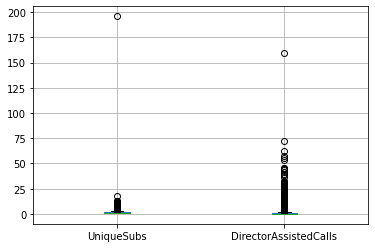

In [24]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

In [25]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers
q1 = cust_df['UniqueSubs'].quantile(0.99)
q2 = cust_df['DirectorAssistedCalls'].quantile(0.99)
cust_df = cust_df[(cust_df['UniqueSubs'] <= q1) & (cust_df['DirectorAssistedCalls'] <= q2)]

<AxesSubplot:>

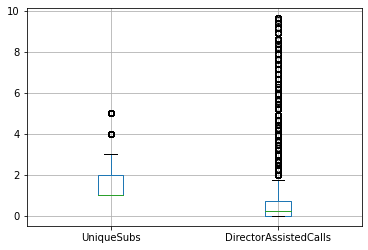

In [26]:
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

<AxesSubplot:xlabel='OverageMinutes', ylabel='MonthlyRevenue'>

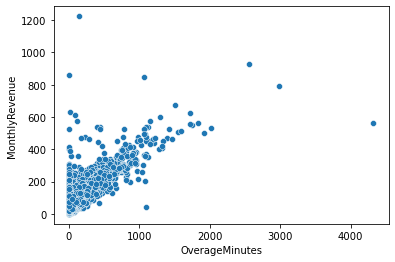

In [27]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'OverageMinutes', y = 'MonthlyRevenue', data = cust_df )

<mark>__Result:__
    
Type your interpretation here based on the scatter plot analysis:
    <br>**Generally, there is a positive relationship between OverageMinutes and MonthlyRevenue as seen from the cluster on the bottom left, the data points tend to be trending upwards. However, there are a few exceptions of outliers that are scattered further away from the cluster.**

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

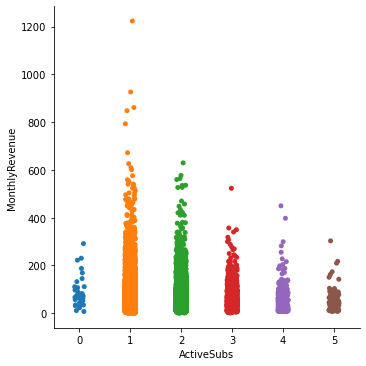

In [28]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x = 'ActiveSubs', y= 'MonthlyRevenue', data= cust_df)

<mark>__Result:__
    
Type your interpretation here based on the category plot analysis
    **<br>Observing the ActiveSubs of 1 to 5, it is true that higher number of active subscribers leads to lower monthly revenue. The exception is ActiveSubs=0 still having monthly revenue that is similarly close to ActiveSubs=5 just that ActiveSubs=0 has lesser data points compared to ActiveSubs=5.**

### Q2.3 Does credit rating have an impact in churn rate?

Churn      
              count      
Churn            No   Yes
CreditRating             
1-Highest      5737  2547
2-High        13169  5657
3-Good         5695  2560
4-Medium       3892  1370
5-Low          4948  1387
6-VeryLow       802   296
7-Lowest       1480   601

<AxesSubplot:xlabel='CreditRating', ylabel='count'>

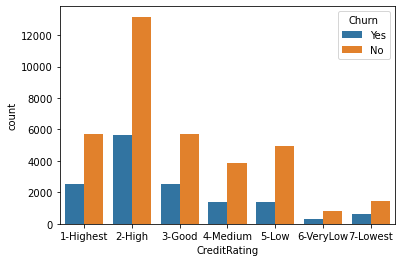

In [29]:
cust_df.groupby(['CreditRating','Churn']).agg({'Churn': ['count']}).unstack()
sns.countplot(x = 'CreditRating', hue = 'Churn', data = cust_df, order= ['1-Highest', '2-High', '3-Good', '4-Medium', '5-Low', '6-VeryLow', '7-Lowest'])

<mark>__Result:__
    
Type your interpretation here based on the analysis above
    **<br>Based on the plot diagram, it seems that as CreditRating falls from 2 to 4, the number of Churn decreases. Other than this observation, there is no relationship that can be drawn from Credit Rating and Churn.**

## Placeholder for additional exploratory analysis

In [30]:
categorical_df = cust_df.select_dtypes(include='object')
categorical_df.columns

Index(['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'BuysViaMailOrder',
       'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer',
       'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser',
       'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'CreditRating',
       'PrizmCode', 'Occupation'],
      dtype='object')

In [31]:
categorical_df['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)

ServiceArea


<AxesSubplot:>

<BarContainer object of 727 artists>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

Text(0.5, 1.0, 'Counts for ServiceArea\n No Churn')

Text(0, 0.5, 'count')

(0.0, 1214.0)

<AxesSubplot:>

<BarContainer object of 594 artists>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

Text(0.5, 1.0, 'Counts for ServiceArea\n Churn')

Text(0, 0.5, 'count')

(0.0, 1214.0)

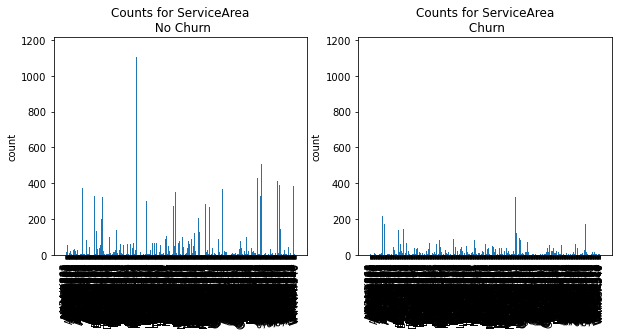

ChildrenInHH


<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for ChildrenInHH\n No Churn')

Text(0, 0.5, 'count')

(0.0, 27154.0)

<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for ChildrenInHH\n Churn')

Text(0, 0.5, 'count')

(0.0, 27154.0)

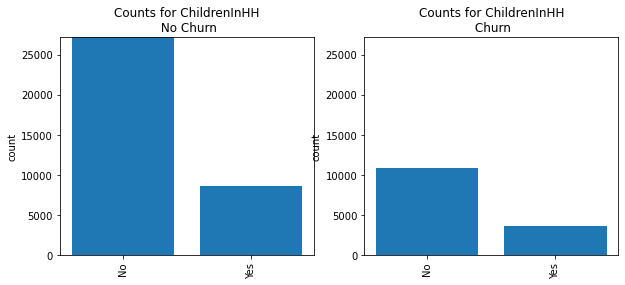

HandsetRefurbished


<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for HandsetRefurbished\n No Churn')

Text(0, 0.5, 'count')

(0.0, 31030.0)

<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for HandsetRefurbished\n Churn')

Text(0, 0.5, 'count')

(0.0, 31030.0)

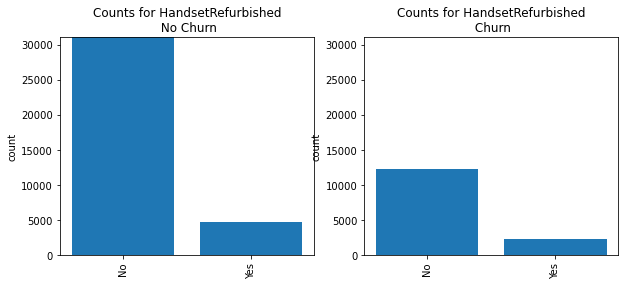

HandsetWebCapable


<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for HandsetWebCapable\n No Churn')

Text(0, 0.5, 'count')

(0.0, 32642.0)

<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for HandsetWebCapable\n Churn')

Text(0, 0.5, 'count')

(0.0, 32642.0)

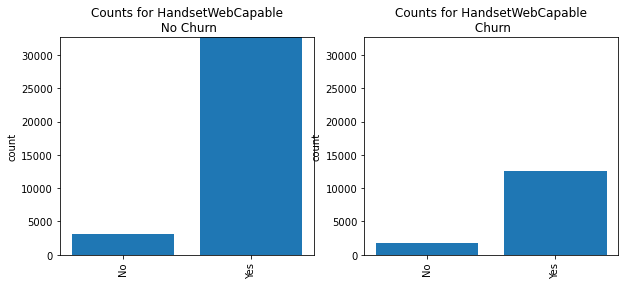

TruckOwner


<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for TruckOwner\n No Churn')

Text(0, 0.5, 'count')

(0.0, 28989.0)

<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for TruckOwner\n Churn')

Text(0, 0.5, 'count')

(0.0, 28989.0)

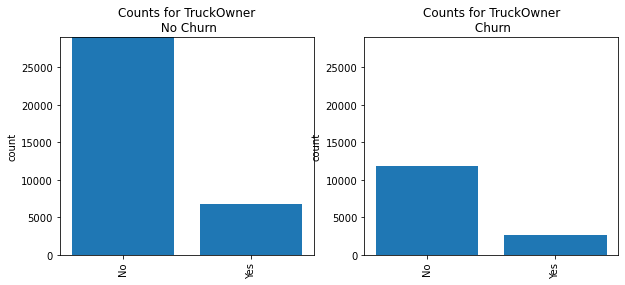

RVOwner


<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for RVOwner\n No Churn')

Text(0, 0.5, 'count')

(0.0, 32791.0)

<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for RVOwner\n Churn')

Text(0, 0.5, 'count')

(0.0, 32791.0)

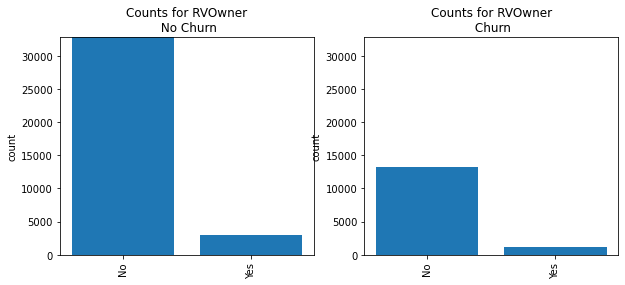

BuysViaMailOrder


<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for BuysViaMailOrder\n No Churn')

Text(0, 0.5, 'count')

(0.0, 22516.0)

<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for BuysViaMailOrder\n Churn')

Text(0, 0.5, 'count')

(0.0, 22516.0)

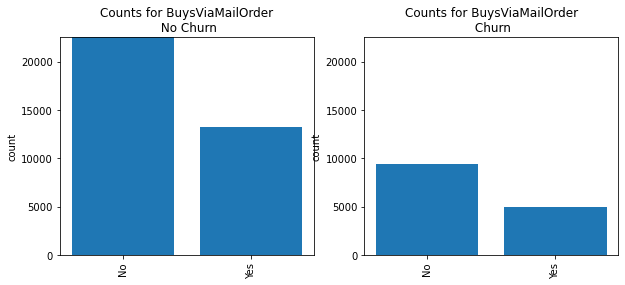

RespondsToMailOffers


<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for RespondsToMailOffers\n No Churn')

Text(0, 0.5, 'count')

(0.0, 21962.0)

<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for RespondsToMailOffers\n Churn')

Text(0, 0.5, 'count')

(0.0, 21962.0)

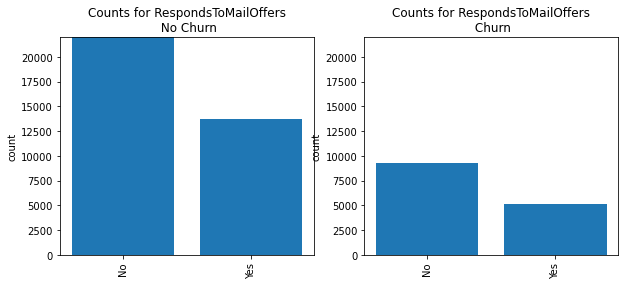

OptOutMailings


<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for OptOutMailings\n No Churn')

Text(0, 0.5, 'count')

(0.0, 35193.0)

<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for OptOutMailings\n Churn')

Text(0, 0.5, 'count')

(0.0, 35193.0)

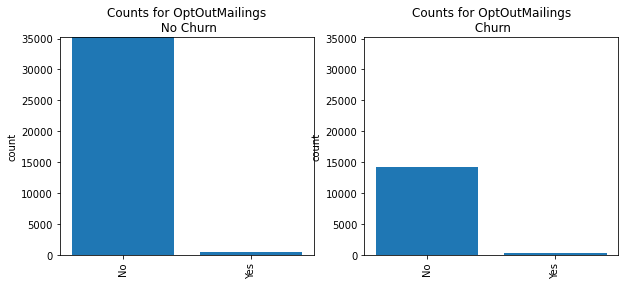

NonUSTravel


<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for NonUSTravel\n No Churn')

Text(0, 0.5, 'count')

(0.0, 33680.0)

<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for NonUSTravel\n Churn')

Text(0, 0.5, 'count')

(0.0, 33680.0)

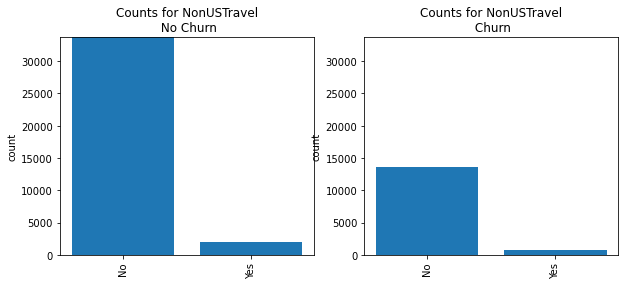

OwnsComputer


<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for OwnsComputer\n No Churn')

Text(0, 0.5, 'count')

(0.0, 29048.0)

<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for OwnsComputer\n Churn')

Text(0, 0.5, 'count')

(0.0, 29048.0)

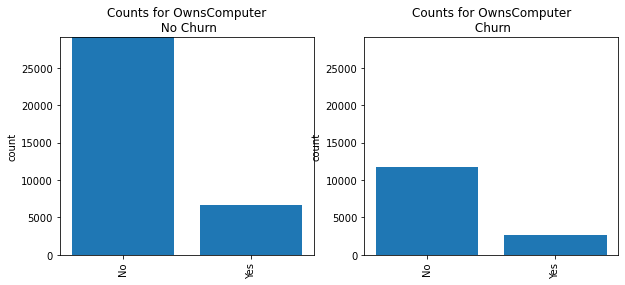

HasCreditCard


<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for HasCreditCard\n No Churn')

Text(0, 0.5, 'count')

(0.0, 24287.0)

<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for HasCreditCard\n Churn')

Text(0, 0.5, 'count')

(0.0, 24287.0)

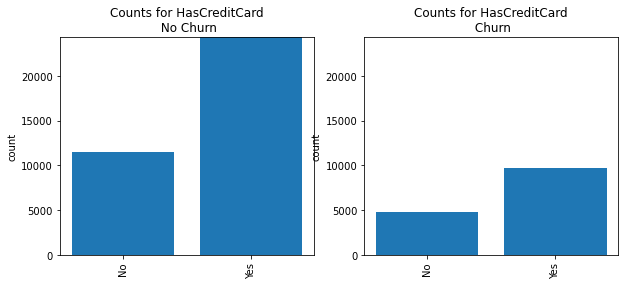

NewCellphoneUser


<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for NewCellphoneUser\n No Churn')

Text(0, 0.5, 'count')

(0.0, 28780.0)

<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for NewCellphoneUser\n Churn')

Text(0, 0.5, 'count')

(0.0, 28780.0)

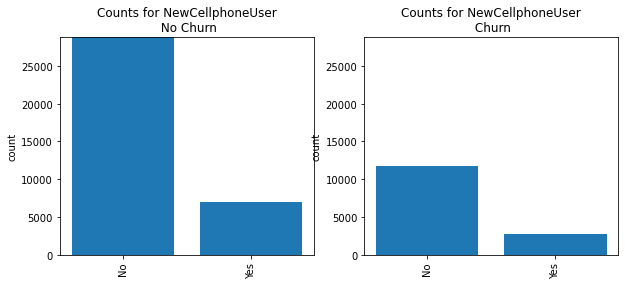

NotNewCellphoneUser


<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for NotNewCellphoneUser\n No Churn')

Text(0, 0.5, 'count')

(0.0, 30882.0)

<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for NotNewCellphoneUser\n Churn')

Text(0, 0.5, 'count')

(0.0, 30882.0)

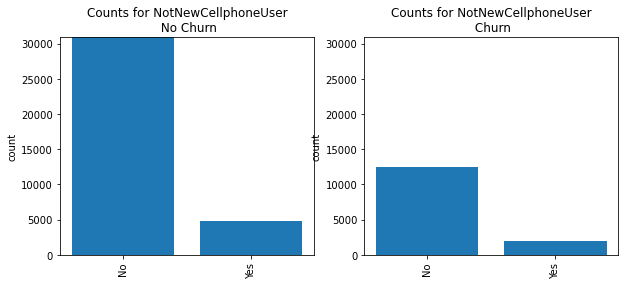

OwnsMotorcycle


<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for OwnsMotorcycle\n No Churn')

Text(0, 0.5, 'count')

(0.0, 35266.0)

<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for OwnsMotorcycle\n Churn')

Text(0, 0.5, 'count')

(0.0, 35266.0)

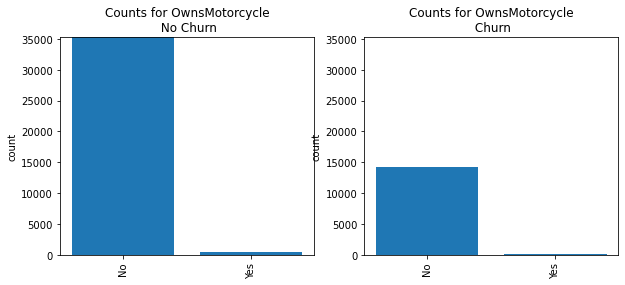

MadeCallToRetentionTeam


<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for MadeCallToRetentionTeam\n No Churn')

Text(0, 0.5, 'count')

(0.0, 34790.0)

<AxesSubplot:>

<BarContainer object of 2 artists>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for MadeCallToRetentionTeam\n Churn')

Text(0, 0.5, 'count')

(0.0, 34790.0)

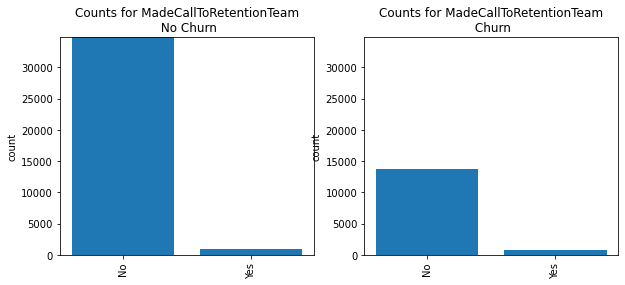

CreditRating


<AxesSubplot:>

<BarContainer object of 7 artists>

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for CreditRating\n No Churn')

Text(0, 0.5, 'count')

(0.0, 13169.0)

<AxesSubplot:>

<BarContainer object of 7 artists>

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for CreditRating\n Churn')

Text(0, 0.5, 'count')

(0.0, 13169.0)

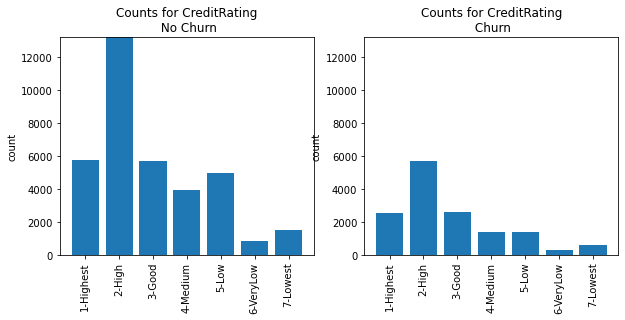

PrizmCode


<AxesSubplot:>

<BarContainer object of 4 artists>

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for PrizmCode\n No Churn')

Text(0, 0.5, 'count')

(0.0, 17291.0)

<AxesSubplot:>

<BarContainer object of 4 artists>

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for PrizmCode\n Churn')

Text(0, 0.5, 'count')

(0.0, 17291.0)

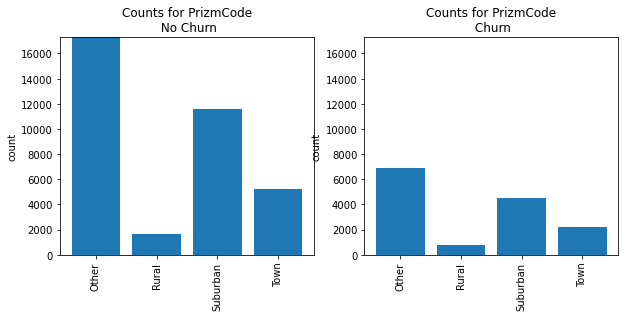

Occupation


<AxesSubplot:>

<BarContainer object of 8 artists>

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for Occupation\n No Churn')

Text(0, 0.5, 'count')

(0.0, 26231.0)

<AxesSubplot:>

<BarContainer object of 8 artists>

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Counts for Occupation\n Churn')

Text(0, 0.5, 'count')

(0.0, 26231.0)

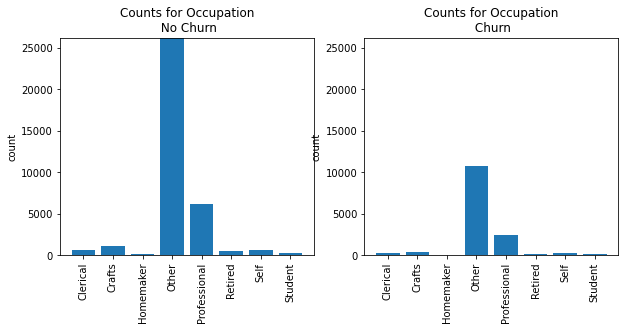

In [32]:
cat_cols = ['ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'BuysViaMailOrder',
       'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer',
       'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser',
       'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'CreditRating',
       'PrizmCode', 'Occupation']

categorical_df['dummy'] = np.ones(shape = categorical_df.shape[0])
for col in cat_cols:
    print(col)
    counts = categorical_df[['dummy', 'Churn', col]].groupby(['Churn', col], as_index = False).count()
    temp = counts[counts['Churn'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['Churn'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for '+ col + '\n No Churn')
    plt.ylabel('count')
    
    column = counts["dummy"]
    max_value = column.max()
    plt.ylim(0,max_value)
    plt.subplot(1, 2, 2)
    temp = counts[counts['Churn'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Churn')
    plt.ylabel('count')

    column = counts["dummy"]
    max_value = column.max()
    plt.ylim(0,max_value)
    plt.show()

### Conclusion: Using data visualisation for categorical features, there is no distinct difference in the proportions for each label category except for ServiceArea.

### Churn vs No Churn Data

<AxesSubplot:title={'center':'MonthlyRevenue'}, xlabel='[Churn]'>

Text(0.5, 1.0, 'Churn vs Monthly Revenue')

Text(0.5, 0, 'Churn')

Text(0, 0.5, 'MonthlyRevenue')

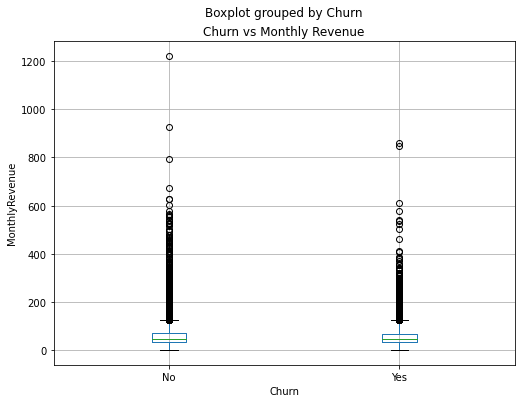

In [33]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()    
cust_df[['MonthlyRevenue','Churn']].boxplot(by = 'Churn', ax = ax)
ax.set_title('Churn vs Monthly Revenue')
ax.set_xlabel('Churn')
ax.set_ylabel('MonthlyRevenue')

In [34]:
churn_cust_df = cust_df[cust_df['Churn'] == 'Yes']
no_churn_cust_df = cust_df[cust_df['Churn'] == 'No']

In [35]:
churn_cust_df.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,1.441800e+04,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000
mean,3.194258e+06,57.123910,475.035511,44.266681,0.711481,41.053475,1.348162,-24.170204,-0.517048,5.709065,3.920863,25.958975,1.568414,0.248405,103.440186,23.111007,7.134069,82.108045,60.747683,9.679373,0.010986,1.549126,18.983423,1.546470,1.351020,1.722084,1.492717,422.429949,30.413511,20.124081,0.058052,0.025801,0.047441,4.266334,0.043557
std,1.106953e+05,42.208257,488.459243,22.548171,1.358236,89.005248,9.573113,260.566618,43.403889,8.636032,10.570010,36.859261,4.361205,0.900557,154.265732,32.834516,14.808472,93.331942,83.697761,14.878506,0.451423,4.463689,9.292556,0.801667,0.591757,1.229997,0.845477,259.309137,21.845877,23.498918,0.257294,0.169131,0.242177,3.160339,0.298042
min,3.000002e+06,2.460000,0.000000,-11.000000,0.000000,0.000000,0.000000,-2868.000000,-851.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.099436e+06,32.490000,131.000000,30.000000,0.000000,0.000000,0.000000,-97.000000,-7.500000,0.700000,0.000000,4.300000,0.000000,0.000000,5.800000,2.300000,0.000000,18.700000,8.700000,1.700000,0.000000,0.000000,12.000000,1.000000,1.000000,1.000000,1.000000,251.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.196020e+06,47.205000,326.000000,43.000000,0.000000,3.000000,0.000000,-10.000000,-0.300000,3.000000,1.000000,14.700000,0.000000,0.000000,44.600000,12.000000,1.300000,57.300000,31.300000,5.000000,0.000000,0.000000,17.000000,1.000000,1.000000,1.000000,1.000000,367.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.286008e+06,68.907500,658.000000,55.000000,0.740000,45.000000,0.200000,52.000000,1.500000,7.300000,3.300000,33.925000,1.300000,0.300000,138.875000,31.000000,7.700000,112.700000,79.700000,12.000000,0.000000,1.300000,24.000000,2.000000,2.000000,2.000000,2.000000,564.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399946e+06,861.110000,5410.000000,338.000000,9.650000,2018.000000,850.900000,5192.000000,2483.500000,208.700000,314.700000,771.300000,172.300000,30.000000,2619.300000,520.300000,298.300000,1119.300000,1313.700000,328.700000,33.700000,135.700000,61.000000,5.000000,5.000000,19.000000,10.000000,1669.000000,98.000000,99.000000,4.000000,3.000000,9.000000,9.000000,9.000000


In [36]:
no_churn_cust_df.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,3.572300e+04,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000,35723.000000
mean,3.204590e+06,58.104960,530.491084,47.328696,0.768644,37.302522,1.137600,-5.718809,-1.451849,5.969969,4.035101,28.363816,1.966411,0.306948,116.301696,25.459474,8.365972,90.556846,68.773630,10.069837,0.012801,1.832167,18.583350,1.486521,1.338969,1.816897,1.571229,364.697366,31.874059,21.091062,0.028301,0.014920,0.054419,4.351482,0.057246
std,1.187495e+05,42.390163,518.610711,23.307301,1.411914,92.820623,9.000471,247.448309,35.635832,8.877134,10.673912,37.489836,5.323855,1.218752,165.447598,34.332704,16.847590,101.435860,92.628288,15.220027,0.649197,5.391981,9.917326,0.780305,0.613712,1.327627,0.905932,248.518743,21.923912,24.039459,0.179610,0.128848,0.332370,3.123473,0.409900
min,3.000014e+06,0.350000,0.000000,-9.000000,0.000000,0.000000,0.000000,-3406.000000,-1107.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100904e+06,33.990000,168.000000,30.000000,0.000000,0.000000,0.000000,-76.000000,-6.600000,1.000000,0.000000,5.700000,0.000000,0.000000,9.400000,3.700000,0.000000,24.700000,12.000000,2.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,198.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.203918e+06,48.300000,376.000000,45.000000,0.250000,2.000000,0.000000,-3.000000,-0.300000,3.000000,1.000000,16.700000,0.000000,0.000000,54.900000,14.000000,2.300000,63.000000,37.000000,5.300000,0.000000,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000,311.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.312920e+06,70.420000,731.000000,60.000000,0.990000,38.000000,0.200000,68.000000,1.500000,7.700000,3.700000,36.700000,1.700000,0.300000,155.900000,34.300000,9.700000,122.000000,90.000000,12.300000,0.000000,1.700000,24.000000,2.000000,2.000000,2.000000,2.000000,495.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399974e+06,1223.380000,6336.000000,360.000000,9.650000,4321.000000,1112.400000,4480.000000,1347.000000,221.700000,384.300000,840.000000,327.300000,66.000000,2140.400000,644.300000,519.300000,2090.700000,1474.700000,411.700000,81.300000,212.700000,60.000000,5.000000,5.000000,24.000000,11.000000,1812.000000,99.000000,98.000000,3.000000,3.000000,35.000000,9.000000,25.000000


### *Conclusion: Based on the box plot and comparing the data for customers who churn and don't using .describe(), there is no significant difference except for the Mean of PercChangeMinutes: -24.23 vs -5.73

### Numerical Variables

In [37]:
numerical_df = cust_df.select_dtypes(include=np.number)
numerical_df.columns

Index(['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls',
       'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating'],
      dtype='object')

In [38]:
numerical_df.head()
numerical_df.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
0,3000002,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,2.0,2.0,361.0,62.0,0.0,1,0,0,4,0
1,3000010,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,2.0,1.0,1504.0,40.0,42.0,0,0,0,5,0
2,3000014,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,1.0,1.0,1812.0,26.0,26.0,0,0,0,6,0
3,3000022,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,9.0,4.0,458.0,30.0,0.0,0,0,0,6,0
4,3000026,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,4.0,3.0,852.0,46.0,54.0,0,0,0,9,1


,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.014100e+04,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.000000,50141.00000
mean,3.201619e+06,57.822860,514.544883,46.448216,0.752207,38.381105,1.198147,-11.024491,-1.183048,5.894946,4.002252,27.672306,1.851967,0.290114,112.603380,24.784175,8.011739,88.127401,66.465777,9.957560,0.012279,1.750779,18.698391,1.503759,1.342434,1.789633,1.548653,381.298319,31.454079,20.813007,0.036856,0.018049,0.052412,4.326998,0.05331
std,1.165833e+05,42.339844,510.735596,23.132901,1.396916,91.754596,9.169197,251.426750,38.034305,8.809187,10.644159,37.325115,5.068978,1.136719,162.414026,33.925014,16.296810,99.246221,90.223327,15.123498,0.599050,5.143798,9.743370,0.786967,0.607499,1.301000,0.889671,253.019300,21.911259,23.889056,0.205426,0.141694,0.309156,3.134323,0.38116
min,3.000002e+06,0.350000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3406.000000,-1107.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.100554e+06,33.510000,157.000000,30.000000,0.000000,0.000000,0.000000,-82.000000,-6.800000,0.700000,0.000000,5.000000,0.000000,0.000000,8.200000,3.300000,0.000000,23.000000,11.000000,1.700000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,206.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,3.201278e+06,47.980000,362.000000,45.000000,0.250000,2.000000,0.000000,-5.000000,-0.300000,3.000000,1.000000,16.000000,0.000000,0.000000,52.000000,13.300000,2.000000,61.300000,35.300000,5.300000,0.000000,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000,330.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.00000
75%,3.304602e+06,70.020000,709.000000,60.000000,0.740000,40.000000,0.200000,64.000000,1.500000,7.700000,3.700000,36.000000,1.700000,0.300000,150.800000,33.300000,9.000000,119.300000,87.300000,12.300000,0.000000,1.300000,24.000000,2.000000,2.000000,2.000000,2.000000,516.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.00000
max,3.399974e+06,1223.380000,6336.000000,360.000000,9.650000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,384.300000,840.000000,327.300000,66.000000,2619.300000,644.300000,519.300000,2090.700000,1474.700000,411.700000,81.300000,212.700000,61.000000,5.000000,5.000000,24.000000,11.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.00000


In [39]:
IQR = cust_df.DirectorAssistedCalls.quantile(0.75) - cust_df.DirectorAssistedCalls.quantile(0.25)
Lower_fence = cust_df.DirectorAssistedCalls.quantile(0.25) - (IQR * 3)
Upper_fence = cust_df.DirectorAssistedCalls.quantile(0.75) + (IQR * 3)
print('DirectorAssistedCalls outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

DirectorAssistedCalls outliers are values < -2.2199999999999998 or > 2.96


**1) For DirectorAssistedCalls, min = 0.00 and max = 9.65, so Outliers are > 2.96**

In [40]:
IQR = cust_df.RoamingCalls.quantile(0.75) - cust_df.RoamingCalls.quantile(0.25)
Lower_fence = cust_df.RoamingCalls.quantile(0.25) - (IQR * 3)
Upper_fence = cust_df.RoamingCalls.quantile(0.75) + (IQR * 3)
print('RoamingCalls outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

RoamingCalls outliers are values < -0.6000000000000001 or > 0.8


**2) For RoamingCalls, min = 0.00 and max = 1112.40, so Outliers are > 1.2**

In [41]:
IQR = cust_df.PercChangeMinutes.quantile(0.75) - cust_df.PercChangeMinutes.quantile(0.25)
Lower_fence = cust_df.PercChangeMinutes.quantile(0.25) - (IQR * 3)
Upper_fence = cust_df.PercChangeMinutes.quantile(0.75) + (IQR * 3)
print('PercChangeMinutes outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

PercChangeMinutes outliers are values < -520.0 or > 502.0


**3) For PercChangeMinutes, min = -3406.00 and max = 5192.00, so Outliers are < -534.0 and > 516.0**

In [42]:
IQR = cust_df.PercChangeRevenues.quantile(0.75) - cust_df.PercChangeRevenues.quantile(0.25)
Lower_fence = cust_df.PercChangeRevenues.quantile(0.25) - (IQR * 3)
Upper_fence = cust_df.PercChangeRevenues.quantile(0.75) + (IQR * 3)
print('PercChangeRevenues outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

PercChangeRevenues outliers are values < -31.700000000000003 or > 26.400000000000002


**4) For PercChangeRevenues, min = -1107.70 and max = 2483.50, so Outliers are < -32.8 and > 27.4**

In [43]:
IQR = cust_df.BlockedCalls.quantile(0.75) - cust_df.BlockedCalls.quantile(0.25)
Lower_fence = cust_df.BlockedCalls.quantile(0.25) - (IQR * 3)
Upper_fence = cust_df.BlockedCalls.quantile(0.75) + (IQR * 3)
print('BlockedCalls outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

BlockedCalls outliers are values < -11.100000000000001 or > 14.8


**5) For BlockedCalls, min = 0.00 and max = 384.30, so Outliers are > 14.8**

In [44]:
IQR = cust_df.CallForwardingCalls.quantile(0.75) - cust_df.CallForwardingCalls.quantile(0.25)
Lower_fence = cust_df.CallForwardingCalls.quantile(0.25) - (IQR * 3)
Upper_fence = cust_df.CallForwardingCalls.quantile(0.75) + (IQR * 3)
print('CallForwardingCalls outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

CallForwardingCalls outliers are values < 0.0 or > 0.0


**6) For CallForwardingCalls, min = 0.00 and max = 81.30, so Outliers are > 0.0**

In [45]:
IQR = cust_df.MonthsInService.quantile(0.75) - cust_df.MonthsInService.quantile(0.25)
Lower_fence = cust_df.MonthsInService.quantile(0.25) - (IQR * 3)
Upper_fence = cust_df.MonthsInService.quantile(0.75) + (IQR * 3)
print('MonthsInService outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

MonthsInService outliers are values < -28.0 or > 63.0


**7) For MonthsInService, min = 6.00 and max = 61.00, so there are no Outliers**

In [46]:
IQR = cust_df.Handsets.quantile(0.75) - cust_df.Handsets.quantile(0.25)
Lower_fence = cust_df.Handsets.quantile(0.25) - (IQR * 3)
Upper_fence = cust_df.Handsets.quantile(0.75) + (IQR * 3)
print('Handsets outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Handsets outliers are values < -2.0 or > 5.0


**8) For Handsets, min = 1.00 and max = 24.00, so Outliers are > 5.0**

In [47]:
IQR = cust_df.CurrentEquipmentDays.quantile(0.75) - cust_df.CurrentEquipmentDays.quantile(0.25)
Lower_fence = cust_df.CurrentEquipmentDays.quantile(0.25) - (IQR * 3)
Upper_fence = cust_df.CurrentEquipmentDays.quantile(0.75) + (IQR * 3)
print('CurrentEquipmentDays outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

CurrentEquipmentDays outliers are values < -724.0 or > 1446.0


**9) For CurrentEquipmentDays, min = -5.00 and max = 1812.00, so Outliers are > 1437.0**

In [48]:
IQR = cust_df.AgeHH1.quantile(0.75) - cust_df.AgeHH1.quantile(0.25)
Lower_fence = cust_df.AgeHH1.quantile(0.25) - (IQR * 3)
Upper_fence = cust_df.AgeHH1.quantile(0.75) + (IQR * 3)
print('AgeHH1 outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

AgeHH1 outliers are values < -144.0 or > 192.0


**10) For AgeHH1, min = 0.00 and max = 99.00, so there are no Outliers**

In [49]:
IQR = cust_df.RetentionCalls.quantile(0.75) - cust_df.RetentionCalls.quantile(0.25)
Lower_fence = cust_df.RetentionCalls.quantile(0.25) - (IQR * 3)
Upper_fence = cust_df.RetentionCalls.quantile(0.75) + (IQR * 3)
print('RetentionCalls outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

RetentionCalls outliers are values < 0.0 or > 0.0


**11) For RetentionCalls, min = 0.00 and max = 4.00, so Outliers are > 0.0**

In [50]:
IQR = cust_df.ReferralsMadeBySubscriber.quantile(0.75) - cust_df.ReferralsMadeBySubscriber.quantile(0.25)
Lower_fence = cust_df.ReferralsMadeBySubscriber.quantile(0.25) - (IQR * 3)
Upper_fence = cust_df.ReferralsMadeBySubscriber.quantile(0.75) + (IQR * 3)
print('ReferralsMadeBySubscriber outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

ReferralsMadeBySubscriber outliers are values < 0.0 or > 0.0


**12) For ReferralsMadeBySubscriber, min = 0.00 and max = 35.00, so Outliers are > 0.0**

In [51]:
numerical_df.corr()*100

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
CustomerID,100.000000,0.404742,9.106043,5.591155,0.152875,0.810907,0.423356,-0.692370,0.615109,6.739041,4.044201,9.070837,12.066299,5.839592,4.383603,4.104378,2.849881,-0.939835,10.244515,6.936348,0.050319,2.747906,-76.485053,-3.818411,-4.538495,-28.616999,-29.456032,-41.037256,-11.409426,-8.951510,-5.977126,-4.506518,0.866255,-13.947137,-16.825863
MonthlyRevenue,0.404742,100.000000,69.876272,62.093385,37.512838,78.363594,29.827216,-1.949361,-2.005829,41.643613,22.004297,43.458537,18.513204,18.400619,59.761722,48.016673,36.577583,62.647846,46.277811,40.104009,1.152715,45.319869,-0.961243,-2.365715,-4.876987,22.815191,22.254034,-21.520987,-10.625930,-10.594745,1.084663,1.579230,2.014642,-8.364244,3.177283
MonthlyMinutes,9.106043,69.876272,100.000000,56.810647,36.208117,55.614134,10.611426,-3.877222,-3.758069,58.592062,30.790814,63.701540,37.608736,27.417723,82.417164,68.544700,55.258738,75.901719,76.282676,56.223531,1.834454,60.328003,-7.795470,-4.148264,-7.299979,28.626989,27.883370,-30.996801,-16.301568,-14.287921,0.898702,1.475442,7.008220,-14.833412,3.999016
TotalRecurringCharge,5.591155,62.093385,56.810647,100.000000,30.184309,18.160548,7.203922,-1.153799,-2.332750,33.869426,16.961111,34.317240,14.804264,13.623971,46.695561,39.436427,29.870501,53.397394,35.766681,31.960053,1.384851,33.368959,-5.832983,-3.719639,-6.551667,22.045116,21.337468,-24.809328,-10.353821,-10.043701,-2.452810,-0.366682,3.873859,-7.858364,4.027561
DirectorAssistedCalls,0.152875,37.512838,36.208117,30.184309,100.000000,24.410984,5.440128,-1.801388,-1.414596,24.387120,11.785138,27.870337,9.147279,9.819019,26.436737,31.008714,17.967893,38.709982,26.463962,22.624489,0.250116,22.091733,0.247673,-0.383101,-1.999913,14.912197,14.727741,-13.178592,-7.165716,-7.056091,0.841667,1.364137,0.150875,-2.260950,1.819458
OverageMinutes,0.810907,78.363594,55.614134,18.160548,24.410984,100.000000,6.309820,-2.297489,-1.968646,31.955512,17.373349,34.658362,13.346069,14.955033,50.498439,38.864468,30.552315,49.944729,38.041306,31.087059,0.306935,43.491036,-0.356498,-0.507177,-1.694820,12.796961,12.962932,-11.952813,-6.255253,-6.180105,1.520166,1.026136,0.963263,-5.095016,1.735917
RoamingCalls,0.423356,29.827216,10.611426,7.203922,5.440128,6.309820,100.000000,-4.440029,-6.870590,6.507090,2.955701,3.687780,1.928299,1.924866,4.709901,4.309797,1.935971,6.119977,3.027361,5.917452,0.359531,3.806755,-1.350746,-0.372441,-0.144360,2.153049,1.985443,-2.712015,-1.284652,-1.518477,-0.156683,-0.029663,-0.694233,-1.688937,0.484348
PercChangeMinutes,-0.692370,-1.949361,-3.877222,-1.153799,-1.801388,-2.297489,-4.440029,100.000000,61.379984,-7.951755,-4.631913,-8.176404,-3.998987,-2.737723,-10.458678,-6.319605,-6.914532,-10.568788,-8.657266,-7.993472,-0.521580,-12.350806,0.448391,0.520552,1.006985,-0.705966,-0.805750,-0.756293,1.483822,0.347402,-2.151741,-0.866099,-0.300294,1.118741,-0.452404
PercChangeRevenues,0.615109,-2.005829,-3.758069,-2.332750,-1.414596,-1.968646,-6.870590,61.379984,100.000000,-3.736432,-2.553489,-5.221116,-3.433210,1.430192,-8.093730,-4.272395,-4.656720,-8.151655,-5.428878,-4.054251,-0.257151,-9.174762,-0.641233,0.403525,0.674982,-1.561832,-1.521111,0.509562,1.021297,0.392985,-1.981655,-1.246354,-0.211042,0.799627,-0.518995
DroppedCalls,6.739041,41.643613,58.592062,33.869426,24.387120,31.955512,6.507090,-7.951755,-3.736432,100.000000,18.239379,53.423141,29.506908,25.023120,51.132067,55.787617,38.936093,56.527967,59.609556,

<Figure size 1440x1440 with 0 Axes>

Text(0.5, 1, 'Correlation of Numeric Features')

<AxesSubplot:title={'center':'Correlation of Numeric Features'}>

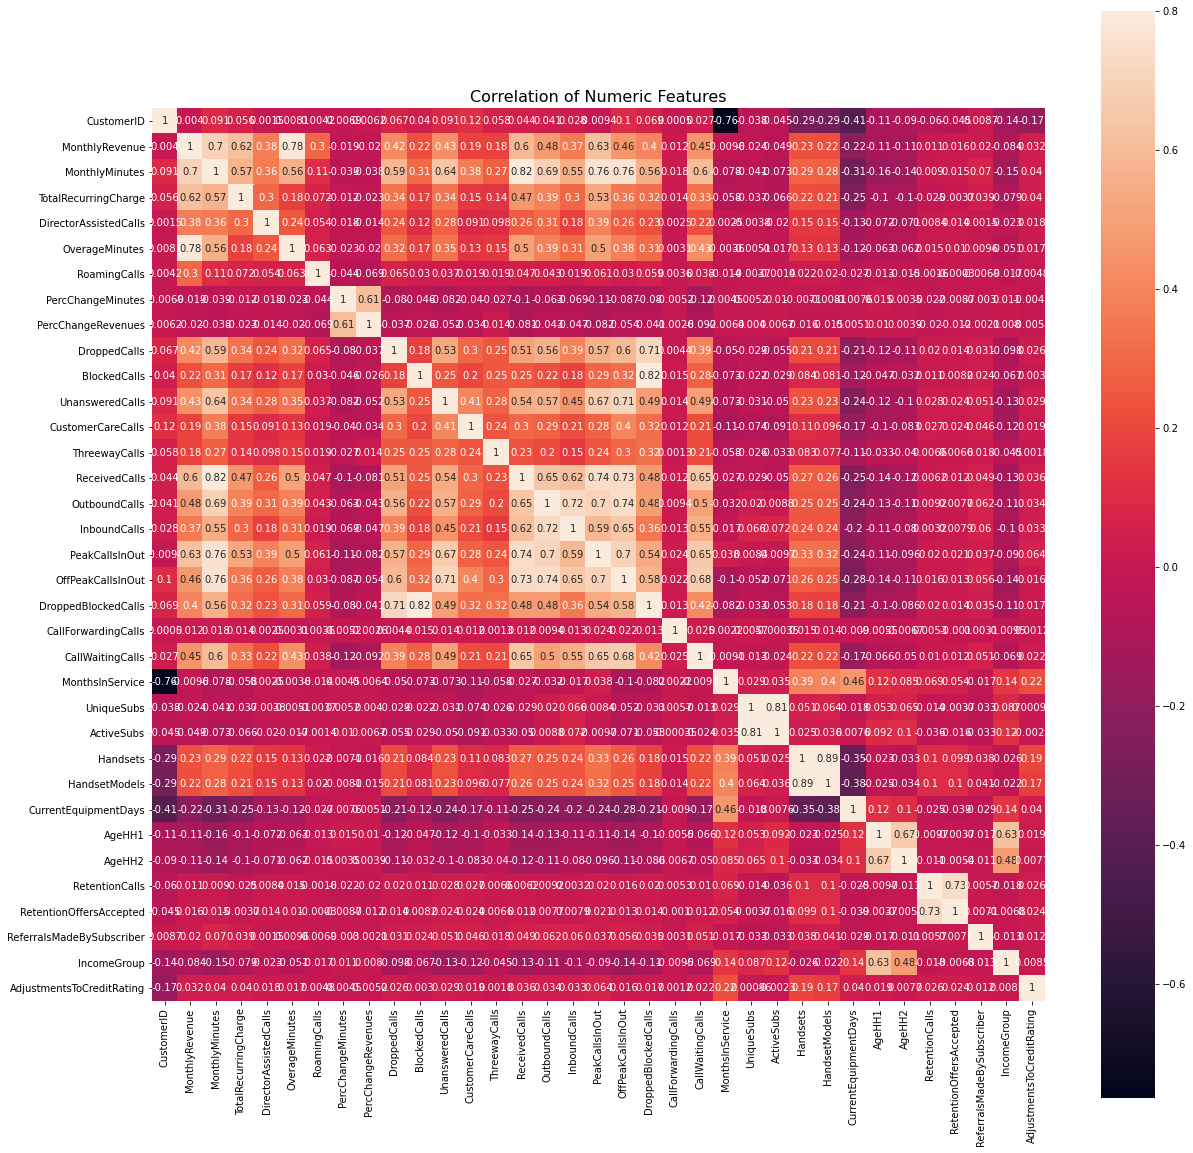

In [52]:
plt.figure(figsize=[20,20])
plt.title('Correlation of Numeric Features', y=1, size=16)
sns.heatmap(numerical_df.corr(), square = True, vmax = 0.8, annot = True)

## Q3. Create additional features to help predict churn

In [53]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    
    #3.1 Percent of current active subs over total subs
    try:
        cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    except ZeroDivisionError:
        cust_df['perc_active_subs'] = 0
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    try:    
        cust_df['perc_recurrent_charge'] = cust_df['TotalRecurringCharge'] / cust_df['MonthlyRevenue']
    except ZeroDivisionError:
        cust_df['perc_recurrent_charge']= 0
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    try:
        cust_df['perc_overage_mins'] = cust_df['OverageMinutes'] / cust_df['MonthlyMinutes']
    except ZeroDivisionError:
        cust_df['perc_overage_mins'] = 0
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    
    
    return cust_df  


In [54]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df=create_features(cust_df)
cust_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,perc_active_subs,perc_recurrent_charge,perc_overage_mins
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,Yes,1-Highest,Suburban,Professional,0.5,0.916667,0.000000
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,No,4-Medium,Suburban,Professional,1.0,1.000589,0.000000
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,No,3-Good,Town,Crafts,1.0,1.000000,0.000000
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,No,4-Medium,Other,Other,1.0,0.911522,0.000000
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,No,1-Highest,Other,Professional,1.0,0.991832,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51037,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,0.0,8.7,0.0,0.0,14.0,0.0,0.0,16.0,14.7,0.7,0.0,0.3,30,1,1,NEVENC760,1.0,1.0,883.0,58.0,0.0,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,0,0,No,No,0,3,No,0,No,3-Good,Other,Other,1.0,0.532581,0.682540
51039,3399922,No,50.00,492.0,50.0,0.00,0.0,0.0,0.0,0.0,3.7,0.3,42.3,0.3,0.0,7.5,6.7,0.0,48.3,19.3,4.0,0.0,0.3,30,1,1,NEVPOW619,1.0,1.0,882.0,36.0,0.0,No,No,Yes,No,No,No,No,No,No,No,No,0,0,No,No,0,0,No,0,No,6-VeryLow,Suburban,Other,1.0,1.000000,0.000000
51040,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,1.0,23.3,0.0,1.7,70.2,25.7,0.3,262.0,12.7,15.3,0.0,0.7,30,1,1,LAXVNY818,1.0,1.0,882.0,50.0,60.0,No,No,No,No,No,Yes,Yes,No,No,No,Yes,0,0,No,No,0,7,No,0,No,1-Highest,Other,Professional,1.0,0.972357,0.005525
51041,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,4.0,1.0,27.0,0.0,0.0,21.7,1.3,0.0,99.3,54.3,5.0,0.0,0.0,30,1,1,LAXDOW562,2.0,2.0,489.0,22.0,0.0,No,No,Yes,No,No,No,No,No,No,No,Yes,0,0,No,No,0,2,No,0,No,5-Low,Other,Professional,1.0,0.255341,0.651042


In [55]:
cust_df.isna().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue                 0
MonthlyMinutes                 0
TotalRecurringCharge           0
DirectorAssistedCalls          0
OverageMinutes                 0
RoamingCalls                   0
PercChangeMinutes              0
PercChangeRevenues             0
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                    0
Handsets                       0
HandsetModels                  0
CurrentEquipmentDays           0
AgeHH1    

In [56]:
cust_df[cust_df['perc_overage_mins'].isna()]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,perc_active_subs,perc_recurrent_charge,perc_overage_mins
4,3000026,Yes,17.14,0.0,17.0,0.0,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,No,1-Highest,Other,Professional,1.0,0.991832,NaN
90,3000618,Yes,27.25,0.0,27.0,0.0,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49,1,1,KCYKCM816,5.0,5.0,383.0,40.0,38.0,Yes,No,Yes,Yes,No,No,No,No,No,No,Yes,0,0,No,Yes,0,8,No,0,No,1-Highest,Town,Other,1.0,0.990826,NaN
110,3000794,Yes,13.25,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,2,2,BOSBOS617,2.0,2.0,1333.0,38.0,0.0,No,No,No,No,No,No,No,No,No,Yes,Yes,0,0,No,Yes,0,7,No,0,No,1-Highest,Other,Other,1.0,0.754717,NaN
152,3001190,Yes,10.00,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54,1,1,DENBOU303,1.0,1.0,1636.0,56.0,54.0,No,No,No,No,No,Yes,Yes,No,No,No,Yes,1,0,No,Yes,0,3,No,1,Yes,1-Highest,Other,Other,1.0,1.000000,NaN
212,3001630,Yes,5.00,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,1,PHXPHX602,17.0,6.0,511.0,56.0,32.0,No,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,1,Yes,1,No,1-Highest,Suburban,Other,1.0,1.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50571,3396198,Yes,10.00,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34,1,1,LAXDOW562,1.0,1.0,1021.0,30.0,0.0,Yes,No,No,No,No,No,No,No,No,No,Yes,0,0,No,No,0,6,No,0,No,4-Medium,Suburban,Self,1.0,1.000000,NaN
50607,3396474,No,30.09,0.0,30.0,0.0,0.0,0.0,0.0,-0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,2,2,LAXCDG310,2.0,2.0,377.0,44.0,38.0,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,No,1-Highest,Other,Other,1.0,0.997009,NaN
50745,3397630,Yes,5.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,29,1,1,LAXMON323,6.0,2.0,387.0,38.0,0.0,No,Yes,Yes,No,No,No,No,No,No,No,Yes,0,0,No,No,0,4,No,0,No,3-Good,Other,Other,1.0,0.000000,NaN
50945,3399202,No,16.99,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,30,1,1,LAXCDG310,1.0,1.0,908.0,64.0,66.0,No,No,Yes,No,No,Yes,Yes,Yes,No,No,Yes,0,0,No,No,0,5,No,0,No,1-Highest,Suburban,Other,1.0,1.000589,NaN


In [57]:
cust_df.dropna(how='any', inplace=True)

In [58]:
cust_df.isna().sum()

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
Children

## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [59]:
cust_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,perc_active_subs,perc_recurrent_charge,perc_overage_mins
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,Yes,1-Highest,Suburban,Professional,0.5,0.916667,0.000000
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,No,4-Medium,Suburban,Professional,1.0,1.000589,0.000000
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,No,3-Good,Town,Crafts,1.0,1.000000,0.000000
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,No,4-Medium,Other,Other,1.0,0.911522,0.000000
5,3000030,No,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,9.0,1.7,13.0,0.7,0.0,42.2,6.7,0.0,33.3,53.0,10.7,0.0,0.7,53,1,1,OKCTUL918,3.0,2.0,231.0,28.0,0.0,No,No,Yes,No,No,No,No,No,Yes,No,Yes,0,0,Yes,No,0,1,No,1,No,3-Good,Other,Other,1.0,1.366623,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51037,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,0.0,8.7,0.0,0.0,14.0,0.0,0.0,16.0,14.7,0.7,0.0,0.3,30,1,1,NEVENC760,1.0,1.0,883.0,58.0,0.0,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,0,0,No,No,0,3,No,0,No,3-Good,Other,Other,1.0,0.532581,0.682540
51039,3399922,No,50.00,492.0,50.0,0.00,0.0,0.0,0.0,0.0,3.7,0.3,42.3,0.3,0.0,7.5,6.7,0.0,48.3,19.3,4.0,0.0,0.3,30,1,1,NEVPOW619,1.0,1.0,882.0,36.0,0.0,No,No,Yes,No,No,No,No,No,No,No,No,0,0,No,No,0,0,No,0,No,6-VeryLow,Suburban,Other,1.0,1.000000,0.000000
51040,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,1.0,23.3,0.0,1.7,70.2,25.7,0.3,262.0,12.7,15.3,0.0,0.7,30,1,1,LAXVNY818,1.0,1.0,882.0,50.0,60.0,No,No,No,No,No,Yes,Yes,No,No,No,Yes,0,0,No,No,0,7,No,0,No,1-Highest,Other,Professional,1.0,0.972357,0.005525
51041,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,4.0,1.0,27.0,0.0,0.0,21.7,1.3,0.0,99.3,54.3,5.0,0.0,0.0,30,1,1,LAXDOW562,2.0,2.0,489.0,22.0,0.0,No,No,Yes,No,No,No,No,No,No,No,Yes,0,0,No,No,0,2,No,0,No,5-Low,Other,Professional,1.0,0.255341,0.651042


In [60]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

#Define columns to be included in X and y
X = cust_df.drop(['ChildrenInHH', 'HandsetRefurbished','HandsetWebCapable', 'TruckOwner', 'RVOwner',
                  'BuysViaMailOrder','RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer',
                  'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser','OwnsMotorcycle', 'MadeCallToRetentionTeam',
                 'CustomerID', 'MonthlyRevenue', 'MonthlyMinutes','TotalRecurringCharge', 'OverageMinutes',
                  'DroppedCalls', 'UnansweredCalls','CustomerCareCalls','ThreewayCalls','ReceivedCalls',
                  'OutboundCalls', 'InboundCalls','PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
                  'CallForwardingCalls','CallWaitingCalls','UniqueSubs','ActiveSubs', 'HandsetModels','AgeHH2',
                  'RetentionCalls','RetentionOffersAccepted','ReferralsMadeBySubscriber',
                  'AdjustmentsToCreditRating'], axis=1)
y = cust_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((34598, 18), (14828, 18))

In [61]:
X_train.dtypes

Churn                     object
DirectorAssistedCalls    float64
RoamingCalls             float64
PercChangeMinutes        float64
PercChangeRevenues       float64
BlockedCalls             float64
MonthsInService            int64
ServiceArea               object
Handsets                 float64
CurrentEquipmentDays     float64
AgeHH1                   float64
IncomeGroup                int64
CreditRating              object
PrizmCode                 object
Occupation                object
perc_active_subs         float64
perc_recurrent_charge    float64
perc_overage_mins        float64
dtype: object

In [62]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Churn', 'ServiceArea', 'CreditRating', 'PrizmCode', 'Occupation']

In [63]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['DirectorAssistedCalls',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'BlockedCalls',
 'MonthsInService',
 'Handsets',
 'CurrentEquipmentDays',
 'AgeHH1',
 'IncomeGroup',
 'perc_active_subs',
 'perc_recurrent_charge',
 'perc_overage_mins']

In [64]:
X_train[numerical].isnull().sum()

DirectorAssistedCalls    0
RoamingCalls             0
PercChangeMinutes        0
PercChangeRevenues       0
BlockedCalls             0
MonthsInService          0
Handsets                 0
CurrentEquipmentDays     0
AgeHH1                   0
IncomeGroup              0
perc_active_subs         0
perc_recurrent_charge    0
perc_overage_mins        0
dtype: int64

In [65]:
X_test[numerical].isnull().sum()

DirectorAssistedCalls    0
RoamingCalls             0
PercChangeMinutes        0
PercChangeRevenues       0
BlockedCalls             0
MonthsInService          0
Handsets                 0
CurrentEquipmentDays     0
AgeHH1                   0
IncomeGroup              0
perc_active_subs         0
perc_recurrent_charge    0
perc_overage_mins        0
dtype: int64

In [66]:
X_train[categorical].isnull().sum()

Churn           0
ServiceArea     0
CreditRating    0
PrizmCode       0
Occupation      0
dtype: int64

In [67]:
X_test[categorical].isnull().sum()

Churn           0
ServiceArea     0
CreditRating    0
PrizmCode       0
Occupation      0
dtype: int64

In [68]:
X_train.isnull().sum()

Churn                    0
DirectorAssistedCalls    0
RoamingCalls             0
PercChangeMinutes        0
PercChangeRevenues       0
BlockedCalls             0
MonthsInService          0
ServiceArea              0
Handsets                 0
CurrentEquipmentDays     0
AgeHH1                   0
IncomeGroup              0
CreditRating             0
PrizmCode                0
Occupation               0
perc_active_subs         0
perc_recurrent_charge    0
perc_overage_mins        0
dtype: int64

In [69]:
X_test.isnull().sum()

Churn                    0
DirectorAssistedCalls    0
RoamingCalls             0
PercChangeMinutes        0
PercChangeRevenues       0
BlockedCalls             0
MonthsInService          0
ServiceArea              0
Handsets                 0
CurrentEquipmentDays     0
AgeHH1                   0
IncomeGroup              0
CreditRating             0
PrizmCode                0
Occupation               0
perc_active_subs         0
perc_recurrent_charge    0
perc_overage_mins        0
dtype: int64

In [70]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])
def min_value(df3, variable, bottom):
    return np.where(df3[variable]<bottom, bottom, df3[variable])

for df3 in [X_train, X_test]:
    df3['DirectorAssistedCalls'] = max_value(df3, 'DirectorAssistedCalls', 2.96)
    df3['RoamingCalls'] = max_value(df3, 'RoamingCalls', 1.2)
    df3['PercChangeMinutes'] = max_value(df3, 'PercChangeMinutes', 516.0)
    df3['PercChangeMinutes'] = min_value(df3, 'PercChangeMinutes', -534.0)
    df3['PercChangeRevenues'] = max_value(df3, 'PercChangeRevenues', 27.4)
    df3['PercChangeRevenues'] = min_value(df3, 'PercChangeRevenues', -32.8)
    df3['Handsets'] = max_value(df3, 'Handsets', 5.0)
    df3['CurrentEquipmentDays'] = max_value(df3, 'CurrentEquipmentDays', 1437.0)

In [71]:
X_train.DirectorAssistedCalls.max(), X_test.DirectorAssistedCalls.max()

(2.96, 2.96)

In [72]:
X_train.RoamingCalls.max(), X_test.RoamingCalls.max()

(1.2, 1.2)

In [73]:
X_train.PercChangeMinutes.max(), X_test.PercChangeMinutes.max()

(516.0, 516.0)

In [74]:
X_train.PercChangeMinutes.min(), X_test.PercChangeMinutes.min()

(-534.0, -534.0)

In [75]:
X_train.PercChangeRevenues.max(), X_test.PercChangeRevenues.max()

(27.4, 27.4)

In [76]:
X_train.PercChangeRevenues.min(), X_test.PercChangeRevenues.min()

(-32.8, -32.8)

In [77]:
X_train.Handsets.max(), X_test.Handsets.max()

(5.0, 5.0)

In [78]:
X_train.CurrentEquipmentDays.max(), X_test.CurrentEquipmentDays.max()

(1437.0, 1437.0)

In [79]:
X_train[numerical].describe()

,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,BlockedCalls,MonthsInService,Handsets,CurrentEquipmentDays,AgeHH1,IncomeGroup,perc_active_subs,perc_recurrent_charge,perc_overage_mins
count,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000
mean,0.622127,0.248431,-9.475692,-1.981022,4.040696,18.659027,1.749032,378.624082,31.436817,4.334412,0.938539,0.904982,0.062314
std,0.923164,0.440314,193.667682,15.119037,10.643525,9.720427,1.074848,249.947059,21.860777,3.137202,0.165587,0.288595,0.112211
min,0.000000,0.000000,-534.000000,-32.800000,0.000000,6.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,-0.280899,0.000000
25%,0.000000,0.000000,-84.000000,-6.900000,0.000000,11.000000,1.000000,205.000000,0.000000,0.000000,1.000000,0.730253,0.000000
50%,0.250000,0.000000,-6.000000,-0.300000,1.000000,16.000000,1.000000,329.000000,36.000000,5.000000,1.000000,0.954869,0.007928
75%,0.740000,0.300000,67.000000,1.700000,3.700000,24.000000,2.000000,513.750000,48.000000,7.000000,1.000000,1.097893,0.082081
max,2.960000,1.200000,516.000000,27.400000,384.300000,61.000000,5.000000,1437.000000,99.000000,9.000000,1.000000,5.142857,1.000000


In [80]:
categorical

['Churn', 'ServiceArea', 'CreditRating', 'PrizmCode', 'Occupation']

In [81]:
X_train[categorical].head()

,Churn,ServiceArea,CreditRating,PrizmCode,Occupation
32277,No,OHHPAR304,4-Medium,Other,Other
29394,No,CHILAG630,2-High,Suburban,Other
33051,Yes,SANSAN210,1-Highest,Suburban,Professional
25826,No,BOSBOS617,2-High,Other,Clerical
14210,Yes,INDIND317,2-High,Town,Other


In [82]:
from sklearn.preprocessing import LabelEncoder
cols=('Churn','ServiceArea','CreditRating','PrizmCode','Occupation')
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(X_train[c].values))
    X_train[c] = lbl.transform(list(X_train[c].values))
    
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(X_test[c].values))
    X_test[c] = lbl.transform(list(X_test[c].values))

X_train.shape
X_test.shape

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

(34598, 18)

(14828, 18)

In [83]:
X_train.head()

,Churn,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,BlockedCalls,MonthsInService,ServiceArea,Handsets,CurrentEquipmentDays,AgeHH1,IncomeGroup,CreditRating,PrizmCode,Occupation,perc_active_subs,perc_recurrent_charge,perc_overage_mins
32277,0,0.00,0.0,25.0,-27.1,76.7,10,475,2.0,32.0,0.0,0,3,0,3,1.0,0.714420,0.007005
29394,0,0.25,0.0,-67.0,0.7,9.0,13,111,1.0,390.0,50.0,9,1,2,3,1.0,0.992063,0.000000
33051,1,0.00,0.0,-174.0,27.4,5.3,11,612,4.0,12.0,54.0,6,0,2,4,0.5,0.339261,0.139918
25826,0,2.96,1.2,45.0,24.0,3.0,15,89,1.0,445.0,36.0,7,1,0,0,1.0,0.663130,0.134715
14210,1,0.25,0.0,-93.0,-0.2,1.3,23,233,1.0,691.0,0.0,0,1,3,3,1.0,0.991736,0.000000


In [84]:
X_test.head()

,Churn,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,BlockedCalls,MonthsInService,ServiceArea,Handsets,CurrentEquipmentDays,AgeHH1,IncomeGroup,CreditRating,PrizmCode,Occupation,perc_active_subs,perc_recurrent_charge,perc_overage_mins
3736,0,0.00,0.0,54.0,4.7,0.0,31,347,3.0,173.0,26.0,5,0,2,3,1.00,1.059462,0.070175
6734,1,0.25,0.0,-2.0,-0.2,0.0,32,477,1.0,955.0,58.0,6,0,2,3,0.50,0.992063,0.000000
44205,1,0.00,0.0,97.0,1.3,0.0,12,397,1.0,349.0,38.0,6,3,0,3,1.00,1.133573,0.000000
18642,0,0.00,0.0,88.0,-0.4,1.7,19,279,2.0,267.0,36.0,4,1,2,3,0.75,0.978474,0.000000
48718,0,2.96,0.5,-22.0,-14.2,2.0,8,347,1.0,239.0,36.0,3,4,2,6,1.00,0.794047,0.028444


In [85]:
X_train.describe()

,Churn,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,BlockedCalls,MonthsInService,ServiceArea,Handsets,CurrentEquipmentDays,AgeHH1,IncomeGroup,CreditRating,PrizmCode,Occupation,perc_active_subs,perc_recurrent_charge,perc_overage_mins
count,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000
mean,0.284120,0.622127,0.248431,-9.475692,-1.981022,4.040696,18.659027,338.986676,1.749032,378.624082,31.436817,4.334412,1.878085,1.136684,3.162524,0.938539,0.904982,0.062314
std,0.451001,0.923164,0.440314,193.667682,15.119037,10.643525,9.720427,197.004106,1.074848,249.947059,21.860777,3.137202,1.573656,1.177078,0.882906,0.165587,0.288595,0.112211
min,0.000000,0.000000,0.000000,-534.000000,-32.800000,0.000000,6.000000,0.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.280899,0.000000
25%,0.000000,0.000000,0.000000,-84.000000,-6.900000,0.000000,11.000000,157.000000,1.000000,205.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.730253,0.000000
50%,0.000000,0.250000,0.000000,-6.000000,-0.300000,1.000000,16.000000,331.000000,1.000000,329.000000,36.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.954869,0.007928
75%,1.000000,0.740000,0.300000,67.000000,1.700000,3.700000,24.000000,467.750000,2.000000,513.750000,48.000000,7.000000,3.000000,2.000000,3.000000,1.000000,1.097893,0.082081
max,1.000000,2.960000,1.200000,516.000000,27.400000,384.300000,61.000000,717.000000,5.000000,1437.000000,99.000000,9.000000,6.000000,3.000000,7.000000,1.000000,5.142857,1.000000


In [86]:
cols = X_train.columns

In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [88]:
X_train = pd.DataFrame(X_train, columns = [cols])

In [89]:
X_test = pd.DataFrame(X_test, columns = [cols])

In [90]:
X_train.describe()

,Churn,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,BlockedCalls,MonthsInService,ServiceArea,Handsets,CurrentEquipmentDays,AgeHH1,IncomeGroup,CreditRating,PrizmCode,Occupation,perc_active_subs,perc_recurrent_charge,perc_overage_mins
count,3.459800e+04,3.459800e+04,3.459800e+04,3.459800e+04,3.459800e+04,3.459800e+04,3.459800e+04,3.459800e+04,3.459800e+04,3.459800e+04,3.459800e+04,3.459800e+04,3.459800e+04,3.459800e+04,3.459800e+04,3.459800e+04,3.459800e+04,3.459800e+04
mean,4.815309e-17,1.271953e-15,-1.044017e-15,8.837453e-17,3.972012e-16,-1.587326e-15,-4.986024e-17,2.905005e-16,-4.907084e-17,-2.330801e-17,-7.545140e-17,-9.371337e-17,5.664727e-16,6.671093e-16,-7.270095e-16,-2.333301e-15,-2.181073e-16,3.259303e-16
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-6.299866e-01,-6.739172e-01,-5.642201e-01,-2.708412e+00,-2.038452e+00,-3.796444e-01,-1.302331e+00,-1.720734e+00,-6.968824e-01,-1.534844e+00,-1.438067e+00,-1.381637e+00,-1.193471e+00,-9.656965e-01,-3.582002e+00,-5.668045e+00,-4.109206e+00,-5.553406e-01
25%,-6.299866e-01,-6.739172e-01,-5.642201e-01,-3.848106e-01,-3.253547e-01,-3.796444e-01,-7.879424e-01,-9.237843e-01,-6.968824e-01,-6.946535e-01,-1.438067e+00,-1.381637e+00,-5.579988e-01,-9.656965e-01,-1.840811e-01,3.711777e-01,-6.054541e-01,-5.553406e-01
50%,-6.299866e-01,-4.031055e-01,-5.642201e-01,1.794694e-02,1.111874e-01,-2.856892e-01,-2.735543e-01,-4.054124e-02,-6.968824e-01,-1.985412e-01,2.087414e-01,2.121627e-01,-5.579988e-01,-1.161232e-01,-1.840811e-01,3.711777e-01,1.728672e-01,-4.846913e-01
75%,1.587335e+00,1.276856e-01,1.171214e-01,3.948867e-01,2.434729e-01,-3.201016e-02,5.494667e-01,6.536168e-01,2.334953e-01,5.406260e-01,7.576777e-01,8.496828e-01,7.129454e-01,7.334500e-01,-1.840811e-01,3.711777e-01,6.684595e-01,1.761554e-01
max,1.587335e+00,2.532494e+00,2.161146e+00,2.713325e+00,1.943341e+00,3.572734e+01,4.355939e+00,1.918837e+00,3.024628e+00,4.234462e+00,3.090657e+00,1.487203e+00,2.619362e+00,1.583023e+00,4.346480e+00,3.711777e-01,1.468470e+01,8.356563e+00


### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [91]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [92]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted model
y_pred_test = logreg.predict(X_test)
y_pred_test

#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
logreg.predict_proba(X_test)[:,0]
logreg.predict_proba(X_test)[:,1]


#Evaluate model accuracy using fitted y value and actual y_test
#Evaluation metrics to be used - GINI, Precision, Recall, confusion matrix
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))

array(['No', 'Yes', 'Yes', ..., 'No', 'No', 'Yes'], dtype=object)

array([9.99780181e-01, 1.98598173e-04, 2.72820485e-04, ...,
       9.99751524e-01, 9.99743626e-01, 2.77146799e-04])

array([2.19818655e-04, 9.99801402e-01, 9.99727180e-01, ...,
       2.48476101e-04, 2.56374265e-04, 9.99722853e-01])

Model accuracy score: 1.0000


In [93]:
y_pred_train = logreg.predict(X_train)
y_pred_train
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

array(['No', 'No', 'Yes', ..., 'Yes', 'No', 'Yes'], dtype=object)

Training-set accuracy score: 1.0000


In [94]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [95]:
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)
logreg100.fit(X_train, y_train)
print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

LogisticRegression(C=100, random_state=0, solver='liblinear')

Training set score: 1.0000
Test set score: 1.0000


In [96]:
logreg05 = LogisticRegression(C=0.5, solver='liblinear', random_state=0)
logreg05.fit(X_train, y_train)
print('Training set score: {:.4f}'.format(logreg05.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg05.score(X_test, y_test)))

LogisticRegression(C=0.5, random_state=0, solver='liblinear')

Training set score: 1.0000
Test set score: 1.0000


In [97]:
y_test.value_counts()

No     10679
Yes     4149
Name: Churn, dtype: int64

In [98]:
null_accuracy = (10679/(10679+4149))
print('Null accuracy score: {0:0.4f}'.format(null_accuracy))

Null accuracy score: 0.7202


In [99]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[10679     0]
 [    0  4149]]

True Positives(TP) =  10679

True Negatives(TN) =  4149

False Positives(FP) =  0

False Negatives(FN) =  0


<AxesSubplot:>

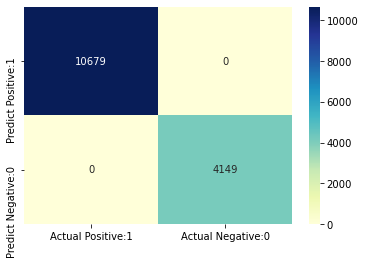

In [100]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [101]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00     10679
         Yes       1.00      1.00      1.00      4149

    accuracy                           1.00     14828
   macro avg       1.00      1.00      1.00     14828
weighted avg       1.00      1.00      1.00     14828



In [102]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [103]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 1.0000


In [104]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0000


In [105]:
precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [106]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


In [107]:
true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 1.0000


In [108]:
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0000


In [109]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 1.0000


In [110]:
y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.99780181e-01, 2.19818655e-04],
       [1.98598173e-04, 9.99801402e-01],
       [2.72820485e-04, 9.99727180e-01],
       [9.99765010e-01, 2.34989856e-04],
       [9.99792730e-01, 2.07269542e-04],
       [2.46934674e-04, 9.99753065e-01],
       [9.99756706e-01, 2.43293561e-04],
       [1.83655072e-04, 9.99816345e-01],
       [2.30618606e-04, 9.99769381e-01],
       [9.99685274e-01, 3.14726448e-04]])

In [111]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No Churn (0)', 'Prob of - Churn (1)'])

y_pred_prob_df

,Prob of - No Churn (0),Prob of - Churn (1)
0,0.999780,0.000220
1,0.000199,0.999801
2,0.000273,0.999727
3,0.999765,0.000235
4,0.999793,0.000207
5,0.000247,0.999753
6,0.999757,0.000243
7,0.000184,0.999816
8,0.000231,0.999769
9,0.999685,0.000315


In [112]:
logreg.predict_proba(X_test)[0:10, 1]

array([2.19818655e-04, 9.99801402e-01, 9.99727180e-01, 2.34989856e-04,
       2.07269542e-04, 9.99753065e-01, 2.43293561e-04, 9.99816345e-01,
       9.99769381e-01, 3.14726448e-04])

In [113]:
y_pred1 = logreg.predict_proba(X_test)[:, 1]

(array([10679.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4149.]),
 array([1.49889623e-04, 1.00122037e-01, 2.00094184e-01, 3.00066330e-01,
        4.00038477e-01, 5.00010624e-01, 5.99982771e-01, 6.99954918e-01,
        7.99927065e-01, 8.99899212e-01, 9.99871359e-01]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Histogram of predicted probabilities of Churn')

(0.0, 1.0)

Text(0.5, 0, 'Predicted probabilities of Churn')

Text(0, 0.5, 'Frequency')

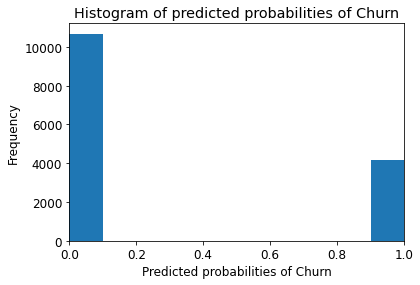

In [114]:
plt.rcParams['font.size'] = 12
plt.hist(y_pred1, bins = 10)
plt.title('Histogram of predicted probabilities of Churn')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of Churn')
plt.ylabel('Frequency')

In [115]:
from sklearn.preprocessing import binarize

for i in range(1,5):
    
    cm1=0
    
    y_pred1 = logreg.predict_proba(X_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, i/10)
    
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
    
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[10679     0]
 [    0  4149]] 

 with 14828 correct predictions,  

 0 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  1.0 

 Sensitivity:  1.0 

 Specificity:  1.0 



With 0.2 threshold the Confusion Matrix is  

 [[10679     0]
 [    0  4149]] 

 with 14828 correct predictions,  

 0 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  1.0 

 Sensitivity:  1.0 

 Specificity:  1.0 



With 0.3 threshold the Confusion Matrix is  

 [[10679     0]
 [    0  4149]] 

 with 14828 correct predictions,  

 0 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  1.0 

 Sensitivity:  1.0 

 Specificity:  1.0 



With 0.4 threshold the Confusion Matrix is  

 [[10679     0]
 [    0  4149]] 

 with 14828 correct predictions,  

 0 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'ROC curve for Churn classifier')

Text(0.5, 0, 'False Positive Rate (1 - Specificity)')

Text(0, 0.5, 'True Positive Rate (Sensitivity)')

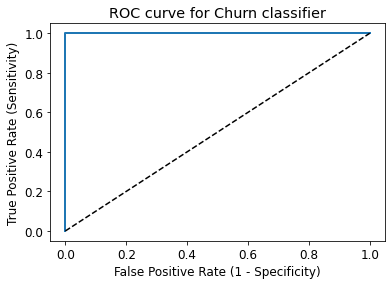

In [116]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Churn classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [117]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 1.0000


In [118]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 1.0000


In [119]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[1. 1. 1. 1. 1.]


In [120]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 1.0000


In [121]:
from sklearn.model_selection import GridSearchCV
parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [122]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 1.0000


Parameters that give the best results : 

 {'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(penalty='l1', random_state=0, solver='liblinear')


In [123]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 1.0000


In [124]:
GINI = (2 * ROC_AUC) - 1
GINI

1.0

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [125]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
lbl.fit(list(y_train.values))
y_train = lbl.transform(list(y_train.values))
    
lbl = LabelEncoder()
lbl.fit(list(y_test.values))
y_test = lbl.transform(list(y_test.values))

y_train.shape
y_test.shape

LabelEncoder()

LabelEncoder()

(34598,)

(14828,)

In [126]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100, random_state=0)
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [127]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted RF model
reg.predict(X_test.iloc[0].values.reshape(1, -1))
y_rf_pred_test = reg.predict(X_test)
y_rf_pred_test

#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
score = reg.score(X_test, y_test)
print(score)

#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_rf_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_rf_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_rf_pred_test)))
print("Accuracy:",metrics.accuracy_score(y_test, y_rf_pred_test))

array([0.])

array([0., 1., 1., ..., 0., 0., 1.])

1.0
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Accuracy: 1.0


In [128]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_rf_pred_test))
print(classification_report(y_test,y_rf_pred_test))
print(accuracy_score(y_test, y_rf_pred_test))

[[10679     0]
 [    0  4149]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10679
           1       1.00      1.00      1.00      4149

    accuracy                           1.00     14828
   macro avg       1.00      1.00      1.00     14828
weighted avg       1.00      1.00      1.00     14828

1.0


<mark>__Result:__
    
Type your answer from the model building exercise here, i.e., which model has better accuracy and using what metrics?<br>
    **Both are equally accurate.**

### Q4.3 Identify most important features impacting churn

In [129]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

RandomForestClassifier()

Churn                    0.942294
CurrentEquipmentDays     0.012977
MonthsInService          0.008755
perc_recurrent_charge    0.005102
PercChangeMinutes        0.004802
perc_overage_mins        0.004385
ServiceArea              0.003249
PercChangeRevenues       0.003114
AgeHH1                   0.002547
BlockedCalls             0.002388
CreditRating             0.002275
DirectorAssistedCalls    0.001569
IncomeGroup              0.001526
Handsets                 0.001332
perc_active_subs         0.001064
RoamingCalls             0.000983
PrizmCode                0.000823
Occupation               0.000813
dtype: float64

## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

In [130]:
#Type your code here to predict churners based on the hold out data set provided
#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4

#Use "predict" function on the transformend data using the best fitted model object
hold_out_data=pd.read_csv(r"C:\Users\User\Desktop\BCG RISE\Group Projects\Mini Project 3\Mini_project_3_Hold_Out_Data.xls")
hold_out_data

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,1.0,61.3,1.7,0.3,55.3,46.3,6.3,83.7,157.0,9.3,0.0,5.7,56,1,1,MILMIL414,7,6,240,30.0,0.0,No,No,Yes,Yes,Yes,Unknown,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,0.7,77.0,8.7,0.0,106.3,14.7,0.7,97.3,90.3,10.3,0.0,0.0,57,1,1,NNYSYR315,6,4,434,56.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,Yes,No,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,3.0,176.0,11.3,0.3,213.9,103.3,0.3,238.3,192.3,15.7,0.0,4.0,55,1,1,MILMIL414,3,3,700,38.0,24.0,No,No,No,No,No,Unknown,No,No,No,No,No,No,0,0,Yes,No,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,0.7,17.3,0.0,0.0,33.1,8.0,4.7,48.3,7.0,2.7,0.0,0.3,59,3,2,SLCSLC801,6,5,48,46.0,0.0,Yes,No,Yes,Yes,Yes,Known,Yes,Yes,Yes,No,No,Yes,0,0,No,Yes,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,6.0,43.7,4.3,0.0,490.1,50.7,8.3,189.3,105.0,8.7,0.0,4.3,52,1,1,OKCTUL918,4,4,408,58.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,3,No,0,10,No,1-Highest,Suburban,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3399938,NaN,85.15,815.0,88.0,0.00,1.0,0.4,0.0,0.0,12.0,0.0,15.3,0.0,1.3,141.0,9.0,3.3,72.0,38.7,12.0,0.0,0.0,27,3,2,LAXVNY818,3,3,230,64.0,64.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,No,No,0,0,No,0,40,No,1-Highest,Other,Other,Unknown
19996,3399950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.7,0.0,0.0,0.0,25,1,1,LAXRIV909,1,1,773,34.0,26.0,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,No,No,0,6,No,0,Unknown,No,1-Highest,Suburban,Other,Yes
19997,3399966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.3,0.7,0.3,5.3,3.3,0.0,0.0,0.0,25,1,1,LAXCOR909,1,1,773,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,8,No,1,Unknown,No,1-Highest,Suburban,Other,No
19998,3399970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,3.3,26.7,4.3,0.0,235.4,35.0,3.3,146.3,115.3,22.3,0.0,6.3,25,1,1,LAXLAG949,3,2,32,28.0,48.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,No,No,0,3,No,0,150,No,3-Good,Other,Other,Unknown


In [133]:
hold_out_data.describe()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,perc_active_subs,perc_recurrent_charge,perc_overage_mins
count,2.000000e+04,0.0,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19865.000000,19865.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,19665.000000,19665.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,19938.000000,19646.000000
mean,3.201925e+06,NaN,58.899712,525.912136,46.946640,0.893764,40.240722,1.186765,-9.052806,-1.237246,6.00466,4.017420,28.526345,1.854365,0.295430,115.280595,25.443640,8.170585,90.661230,68.245900,10.127090,0.010585,1.879430,18.736950,1.522900,1.344800,1.816200,1.569550,379.550450,31.469413,21.192321,0.036500,0.017000,0.04775,4.359000,0.051250,0.936024,0.902726,0.062587
std,1.165204e+05,NaN,43.564203,530.825481,24.083351,2.116538,95.740506,6.848963,249.609021,36.638292,8.91097,9.932891,38.975750,5.323652,1.146122,165.847979,34.991026,16.140458,104.834556,94.785113,15.217792,0.471100,5.483907,9.755645,0.854524,0.618896,1.348669,0.914223,255.552901,22.050726,23.882983,0.204132,0.138967,0.24119,3.134009,0.353312,0.169230,0.289169,0.111504
min,3.000006e+06,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2518.000000,-459.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100522e+06,NaN,33.720000,159.000000,30.000000,0.000000,0.000000,0.000000,-82.000000,-7.200000,0.70000,0.000000,5.300000,0.000000,0.000000,8.700000,3.300000,0.000000,23.000000,11.000000,1.700000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,202.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.727509,0.000000
50%,3.201338e+06,NaN,48.665000,365.000000,45.000000,0.250000,2.000000,0.000000,-4.000000,-0.300000,3.00000,1.000000,16.300000,0.000000,0.000000,51.900000,13.700000,2.000000,61.700000,35.300000,5.700000,0.000000,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000,331.000000,36.000000,0.000000,0.000000,0.000000,0.00000,5.000000,0.000000,1.000000,0.952878,0.008396
75%,3.304237e+06,NaN,70.882500,718.000000,60.000000,0.990000,40.000000,0.300000,66.000000,1.600000,7.70000,3.700000,37.000000,1.700000,0.300000,155.725000,33.700000,9.000000,121.000000,89.300000,12.700000,0.000000,1.700000,24.000000,2.000000,2.000000,2.000000,2.000000,513.000000,48.000000,44.000000,0.000000,0.000000,0.00000,7.000000,0.000000,1.000000,1.097741,0.082853
max,3.399986e+06,NaN,635.060000,7668.000000,350.000000,67.810000,3472.000000,488.800000,3222.000000,895.600000,195.30000,313.000000,676.700000,365.700000,55.700000,3287.200000,610.300000,282.700000,1311.700000,1572.700000,489.700000,54.700000,195.000000,61.000000,11.000000,7.000000,28.000000,16.000000,1823.000000,98.000000,99.000000,4.000000,4.000000,5.00000,9.000000,14.000000,1.000000,4.109589,1.000000


In [135]:
hold_out_data = hold_out_data.drop(hold_out_data[(hold_out_data['MonthlyRevenue'] <= 0) | (hold_out_data['MonthlyRevenue'].isnull())].index)
hold_out_data

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_mins
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,1.0,61.3,1.7,0.3,55.3,46.3,6.3,83.7,157.0,9.3,0.0,5.7,56,1,1,MILMIL414,7,6,240,30.0,0.0,No,No,Yes,Yes,Yes,Unknown,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,5,No,1,150,No,5-Low,Other,Other,No,1.000000,0.643590,0.047619
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,0.7,77.0,8.7,0.0,106.3,14.7,0.7,97.3,90.3,10.3,0.0,0.0,57,1,1,NNYSYR315,6,4,434,56.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,Yes,No,0,6,No,2,80,No,1-Highest,Other,Professional,No,1.000000,1.303639,0.000000
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,3.0,176.0,11.3,0.3,213.9,103.3,0.3,238.3,192.3,15.7,0.0,4.0,55,1,1,MILMIL414,3,3,700,38.0,24.0,No,No,No,No,No,Unknown,No,No,No,No,No,No,0,0,Yes,No,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes,1.000000,0.513663,0.404235
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,0.7,17.3,0.0,0.0,33.1,8.0,4.7,48.3,7.0,2.7,0.0,0.3,59,3,2,SLCSLC801,6,5,48,46.0,0.0,Yes,No,Yes,Yes,Yes,Known,Yes,Yes,Yes,No,No,Yes,0,0,No,Yes,0,4,No,1,200,No,1-Highest,Other,Other,No,0.666667,0.842933,0.104575
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,6.0,43.7,4.3,0.0,490.1,50.7,8.3,189.3,105.0,8.7,0.0,4.3,52,1,1,OKCTUL918,4,4,408,58.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,3,No,0,10,No,1-Highest,Suburban,Other,No,1.000000,0.904650,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19987,3399826,NaN,16.99,0.0,17.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.0,0.0,1.7,0.0,0.0,0.7,1.0,0.0,0.0,0.0,30,1,1,LAXANA714,1,1,886,40.0,0.0,No,No,No,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,Unknown,No,1-Highest,Suburban,Professional,No,1.000000,1.000589,NaN
19989,3399854,NaN,41.84,351.0,30.0,0.99,31.0,0.0,0.0,0.0,5.0,0.3,18.3,0.0,0.0,26.6,0.7,0.0,76.3,35.0,5.3,0.0,0.0,33,1,1,LAXCOV626,3,3,254,38.0,44.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,150,No,4-Medium,Other,Other,Yes,1.000000,0.717017,0.088319
19991,3399862,NaN,83.90,825.0,85.0,8.91,0.0,0.0,0.0,0.0,9.7,0.3,24.0,0.0,0.0,176.7,86.7,16.7,186.7,92.3,10.0,0.0,5.0,31,1,1,LAXSMN310,4,4,380,52.0,42.0,No,No,Yes,No,No,Known,No,No,No,Yes,No,Yes,0,0,No,No,0,6,No,1,30,No,3-Good,Other,Professional,No,1.000000,1.013111,0.000000
19992,3399890,NaN,49.99,361.0,50.0,0.00,0.0,0.0,NaN,NaN,4.3,0.3,16.3,0.0,0.0,94.5,67.3,10.0,90.7,60.7,4.7,0.0,0.7,32,1,1,NEVPOW619,2,2,45,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,Yes,0,0,No,0,30,No,3-Good,Other,Other,Unknown,1.000000,1.000200,0.000000


## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

In [132]:
#Type your code here to plot the lift chart from the best model
#Identify the lift i.e. 3x of capturing churn with and without using the model 
#(Assume: only top 20% high risk customers are to be targetted)






<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?
   